In [1]:
from sklearn import preprocessing
from scipy import signal

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import pandas as pd
import scipy
import os, sys
import math
import scaleogram as scg
import pywt



In [179]:
data_dir = "./ml_data_v2/csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f), index_col=0)
        data.append(df)


## Choose one file to look at

In [180]:
df = data[3]
df.head()

time     dt  Angle  grav1  grav2  grav3  gyro1  gyro2  gyro3  magnet1  \
0  35652  16744     21  -9.77  -0.16  -0.75   0.44  -2.69  -4.44    51.25   
1  54300  18644     21  -9.77  -0.17  -0.76   1.25  -2.56  -1.81    50.88   
2  72668  18364     21  -9.77  -0.17  -0.76   0.50  -2.06   0.12    50.88   
3  89568  16896     21  -9.77  -0.18  -0.76   0.44  -1.81  -0.37    50.69   
4  98544   8972     21  -9.77  -0.18  -0.76   0.44  -1.81  -0.37    50.69   

   ...  accl1  accl2  accl3  linaccl1  linaccl2  linaccl3  quat1  quat2  \
0  ...  -9.53  -0.21  -1.24      0.27      0.10     -0.38  -0.65  -0.24   
1  ...  -9.52  -0.16  -1.07      0.25      0.01     -0.30  -0.65  -0.24   
2  ...  -9.71  -0.43  -1.05      0.06     -0.25     -0.28  -0.65  -0.24   
3  ...  -9.75  -0.50  -1.08      0.01     -0.32     -0.32  -0.65  -0.24   
4  ...  -9.75  -0.50  -1.08      0.01     -0.32     -0.32  -0.65  -0.24   

   quat3  quat4  
0   0.69  -0.21  
1   0.69  -0.21  
2   0.69  -0.21  
3   0.69  -0.21  
4   0.69  -0.21  

[5 rows x 25 columns]

In [181]:
# sampling freqency
f = 1 / (df['dt'].mean() * 1e-6)
ns = df['time'].size
time = df['time']*1e-6

# Plotting

Text(0.5, 1.0, 'Rotation')

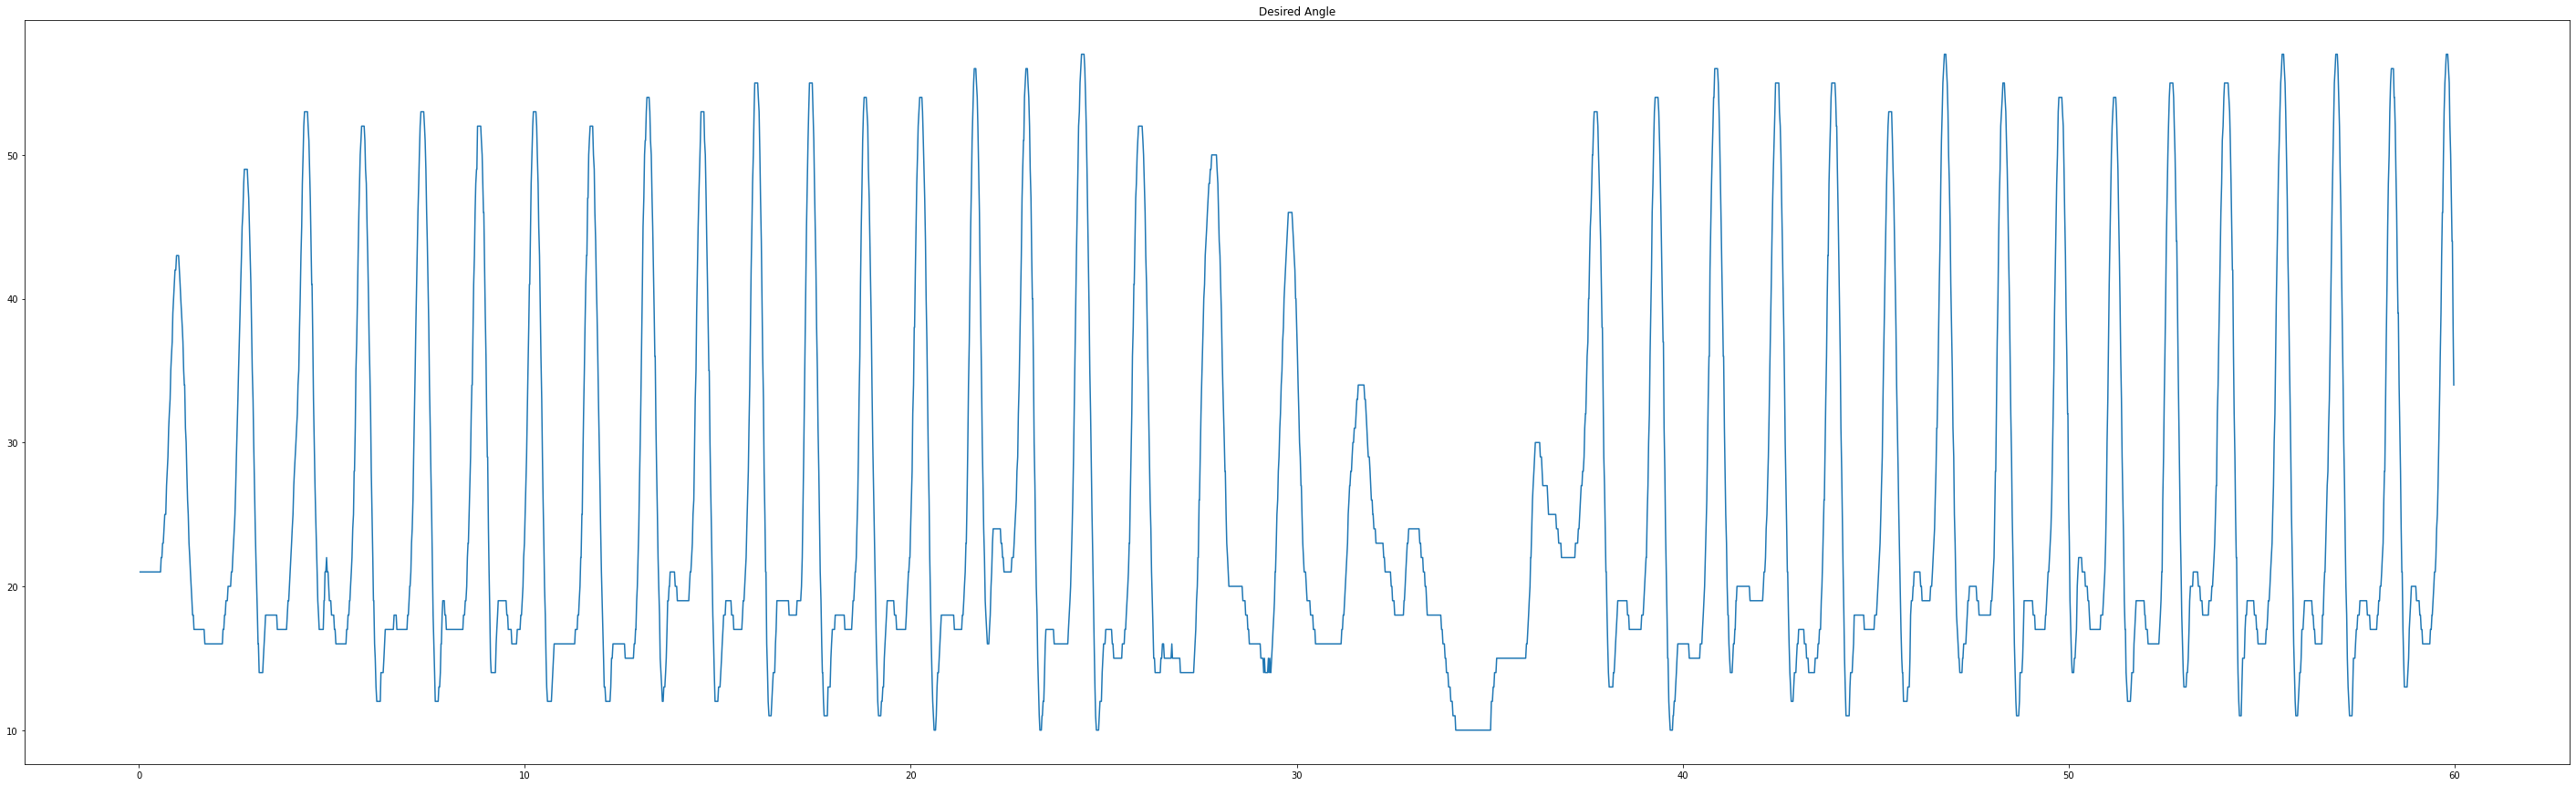

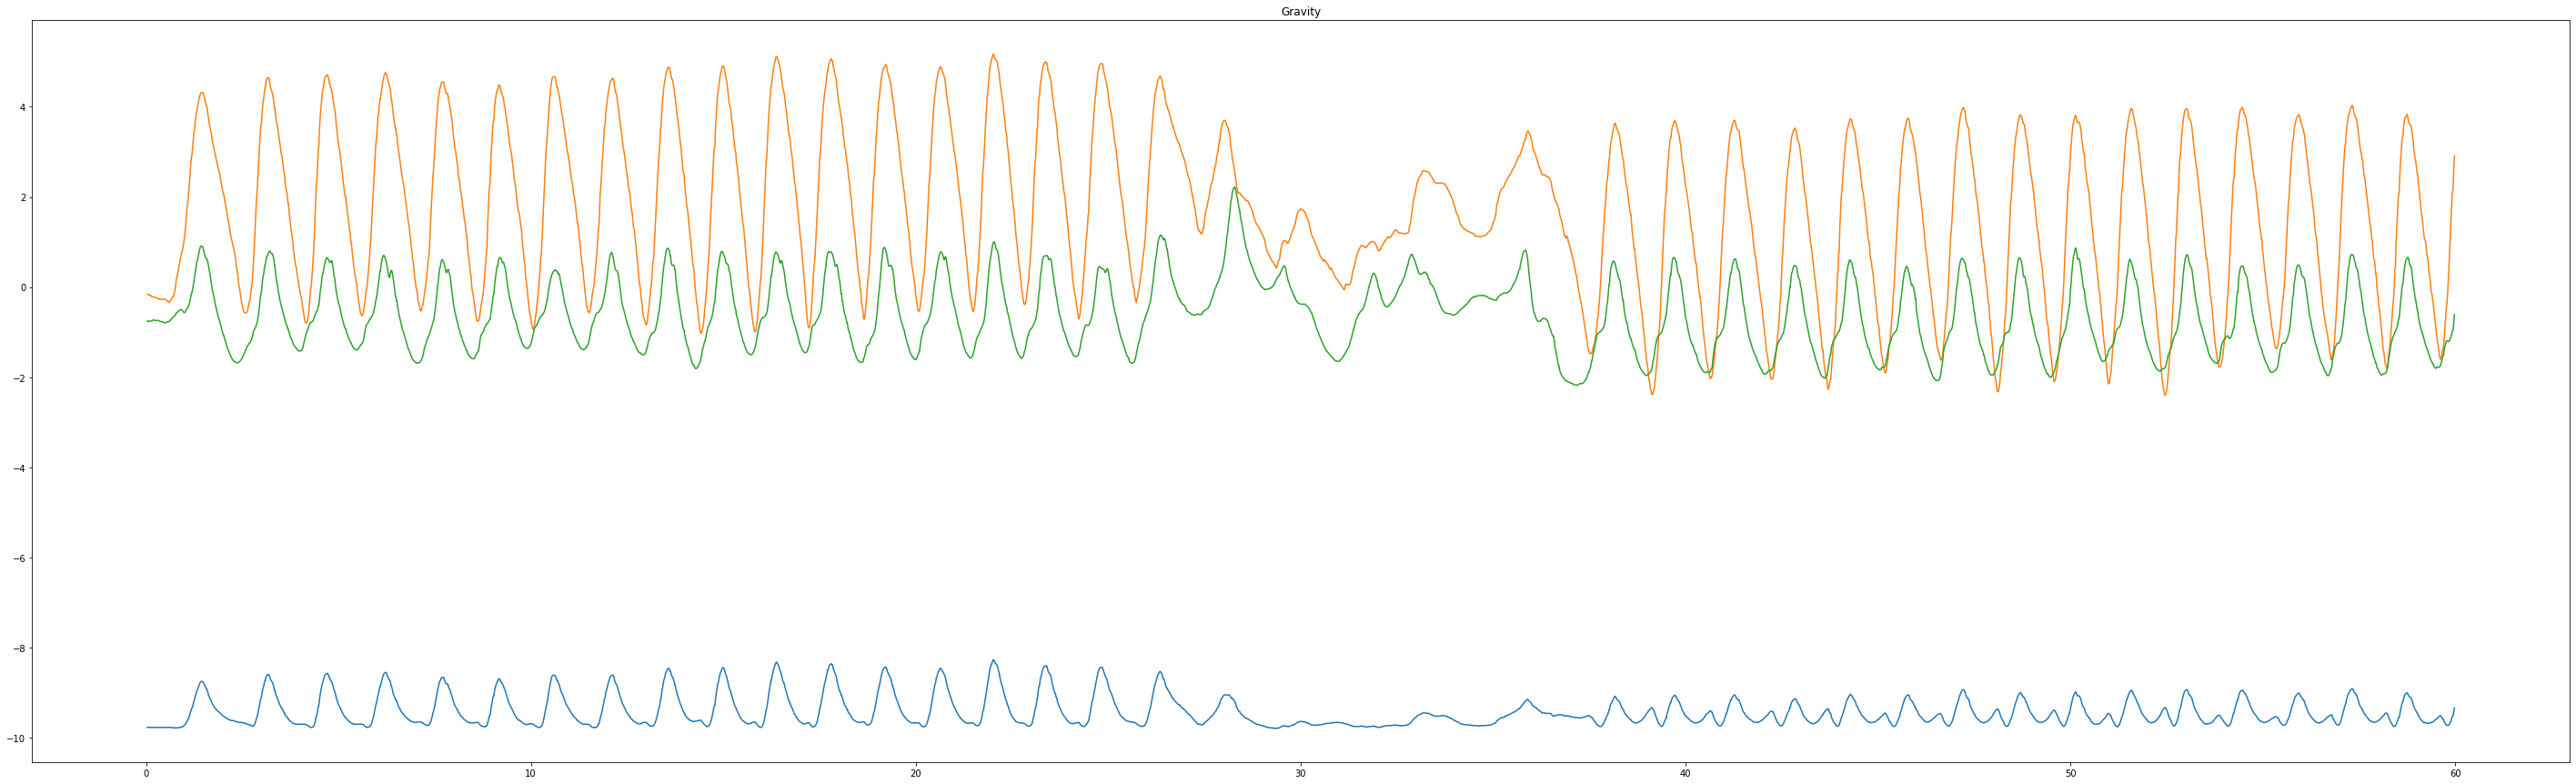

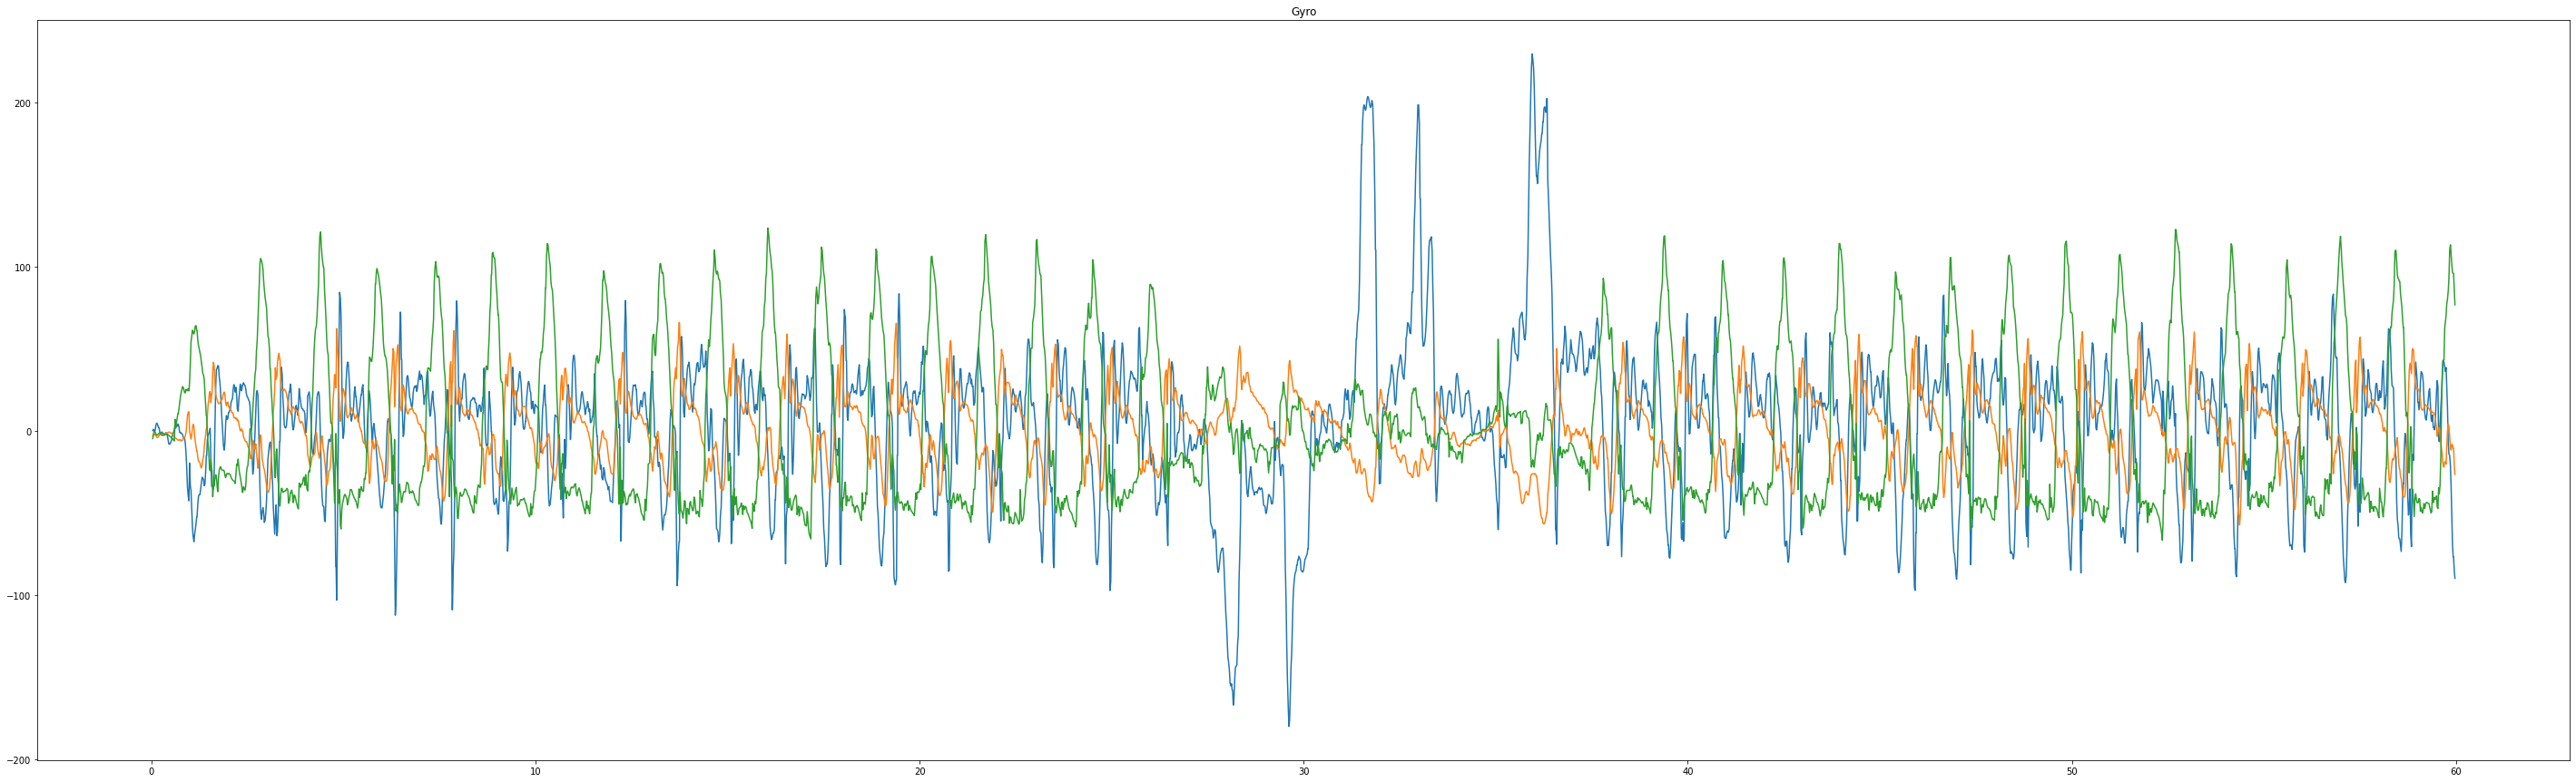

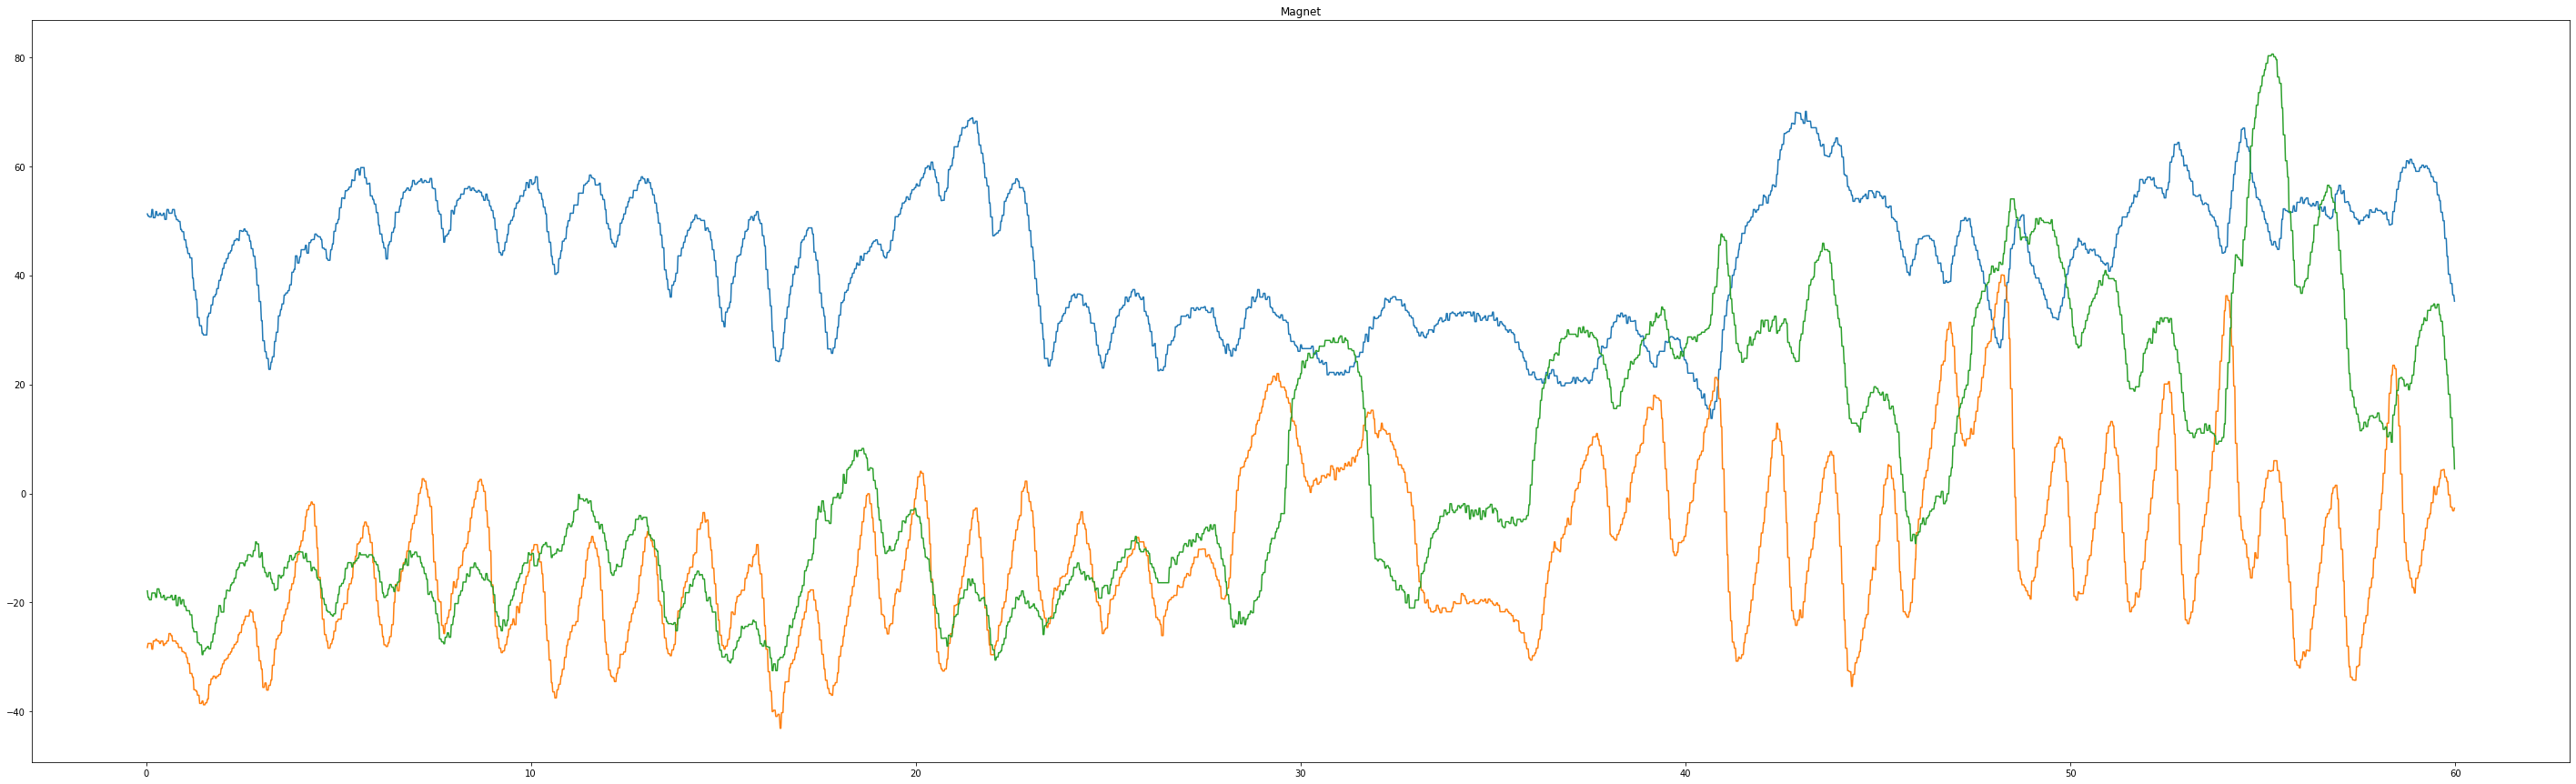

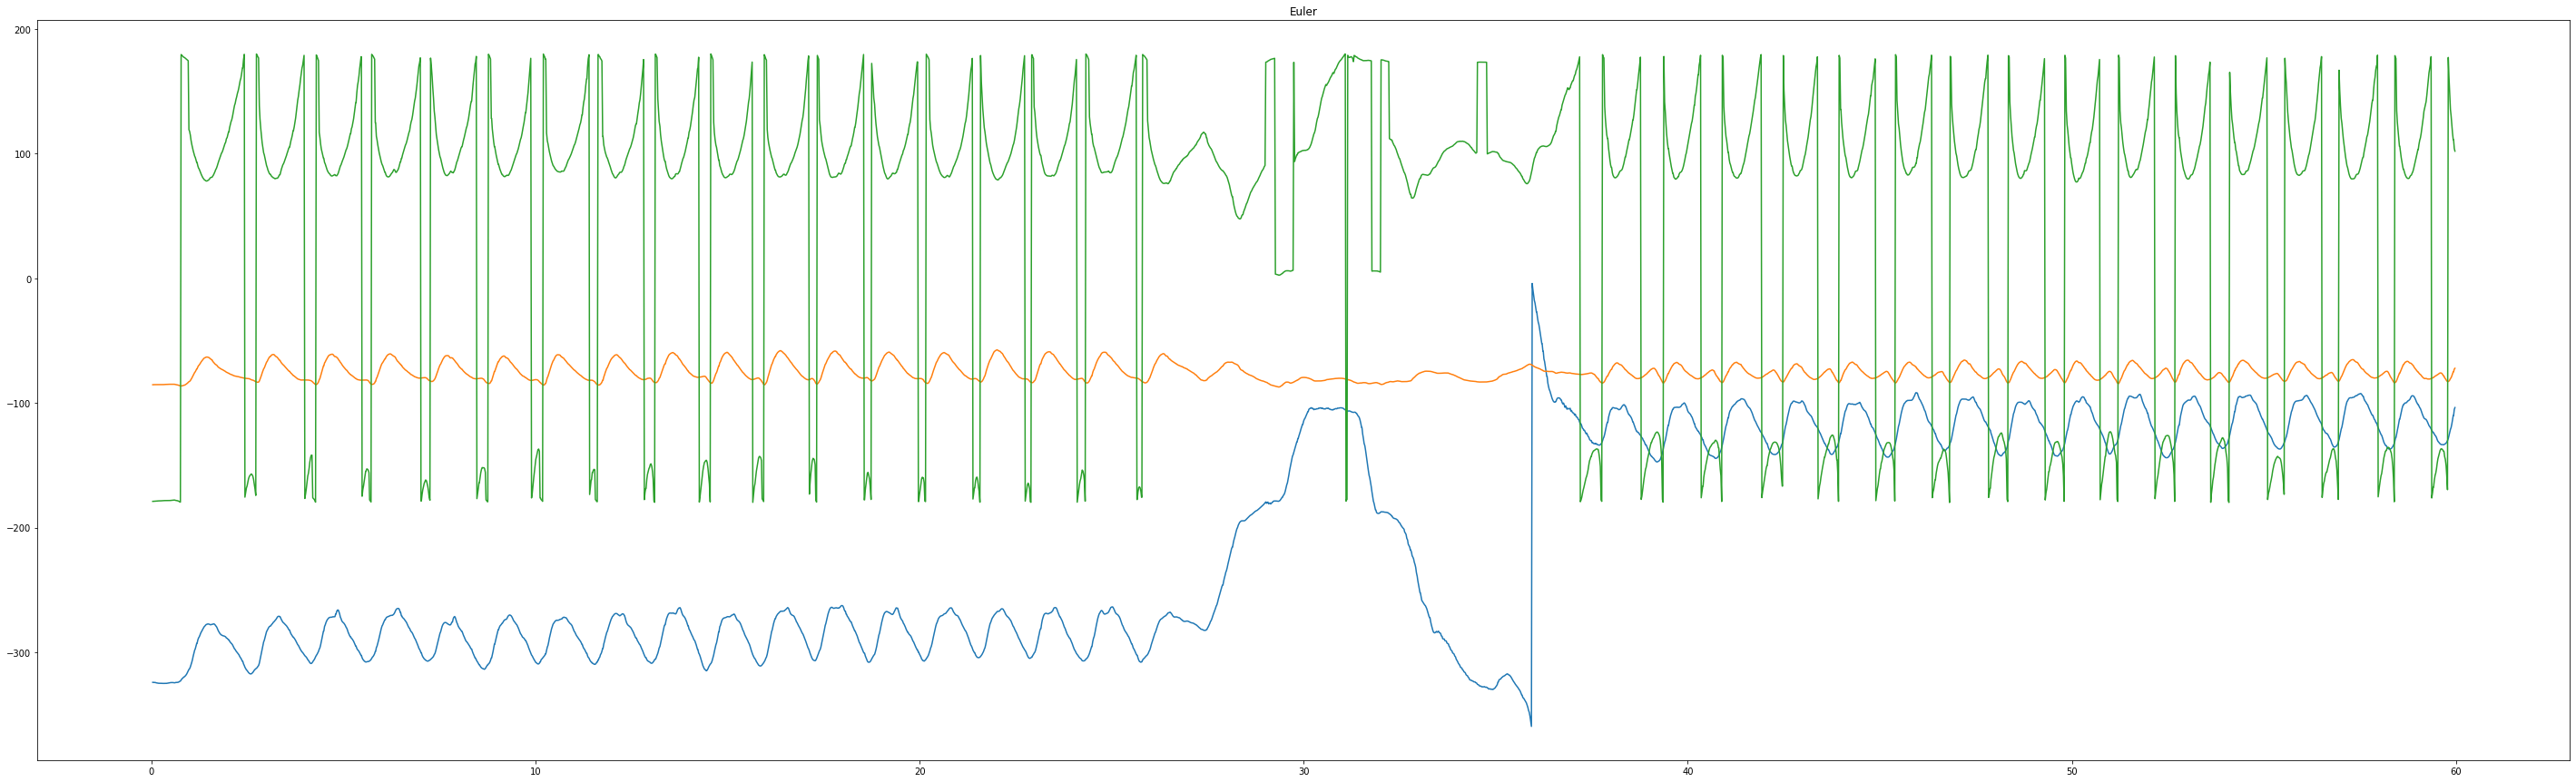

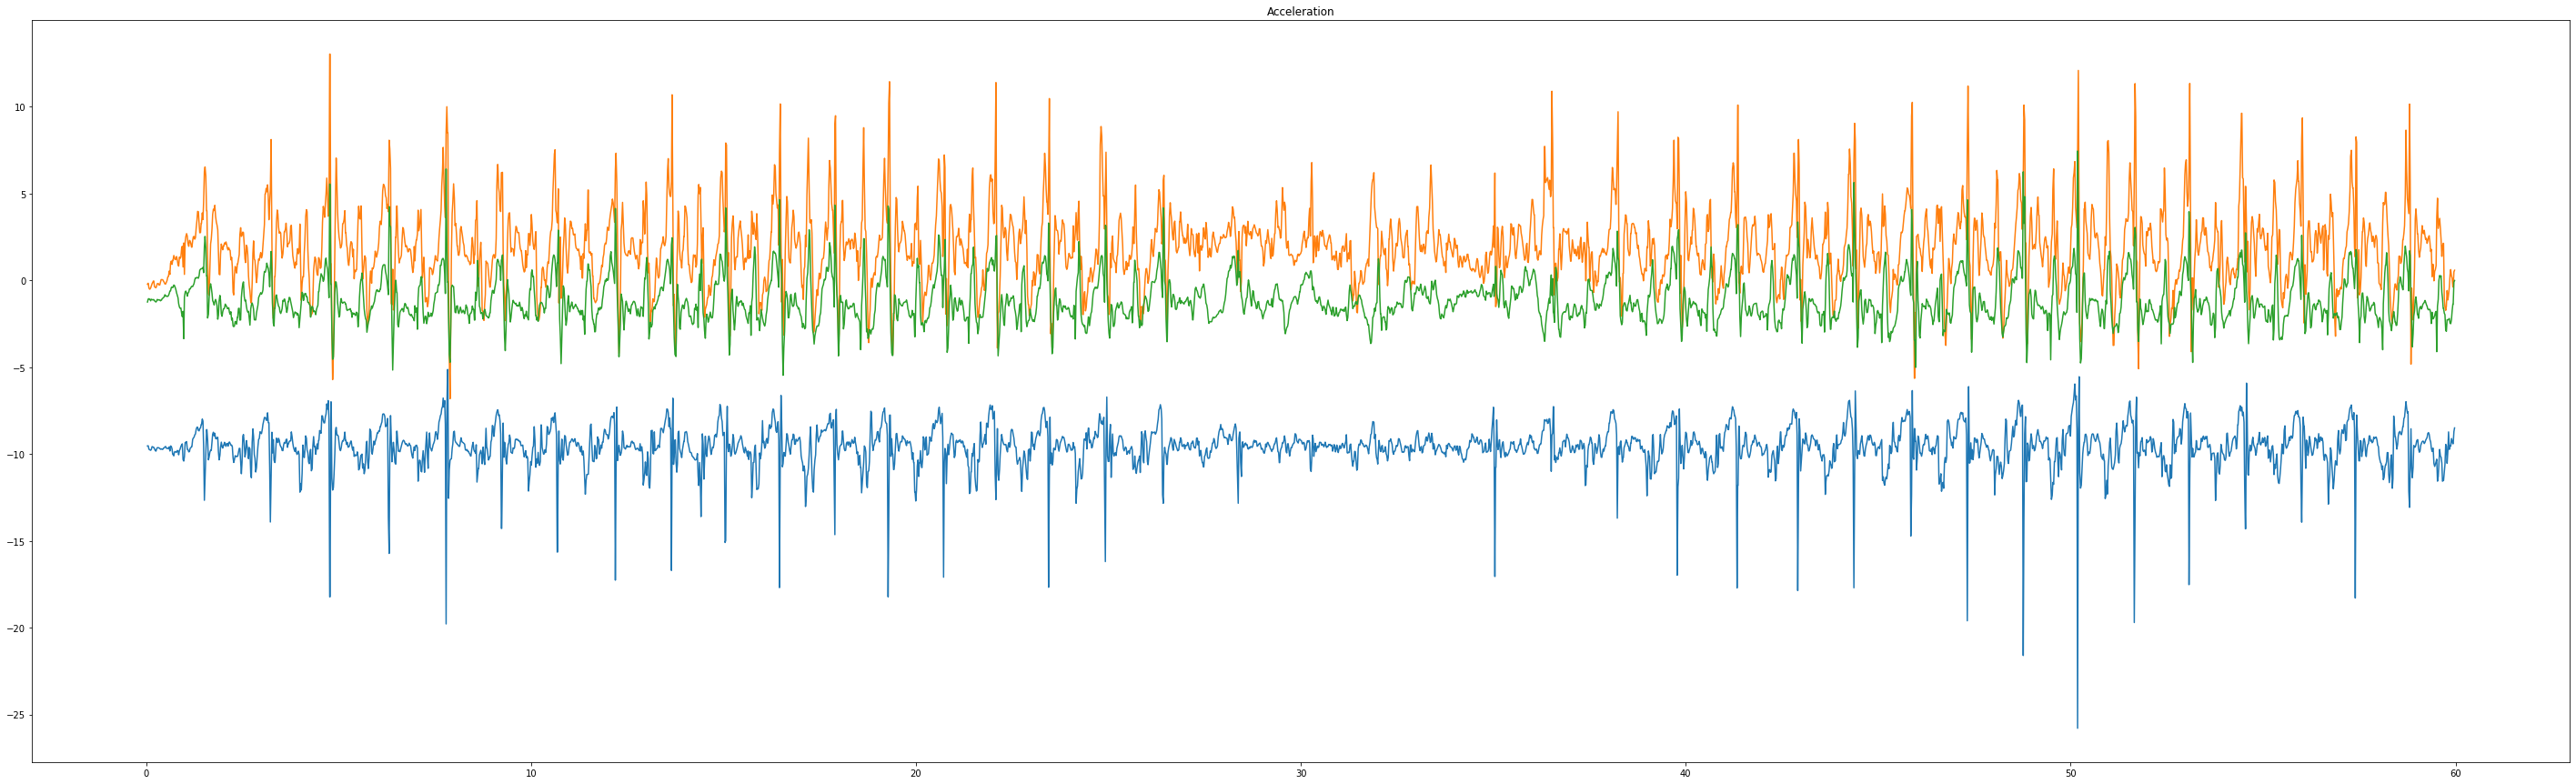

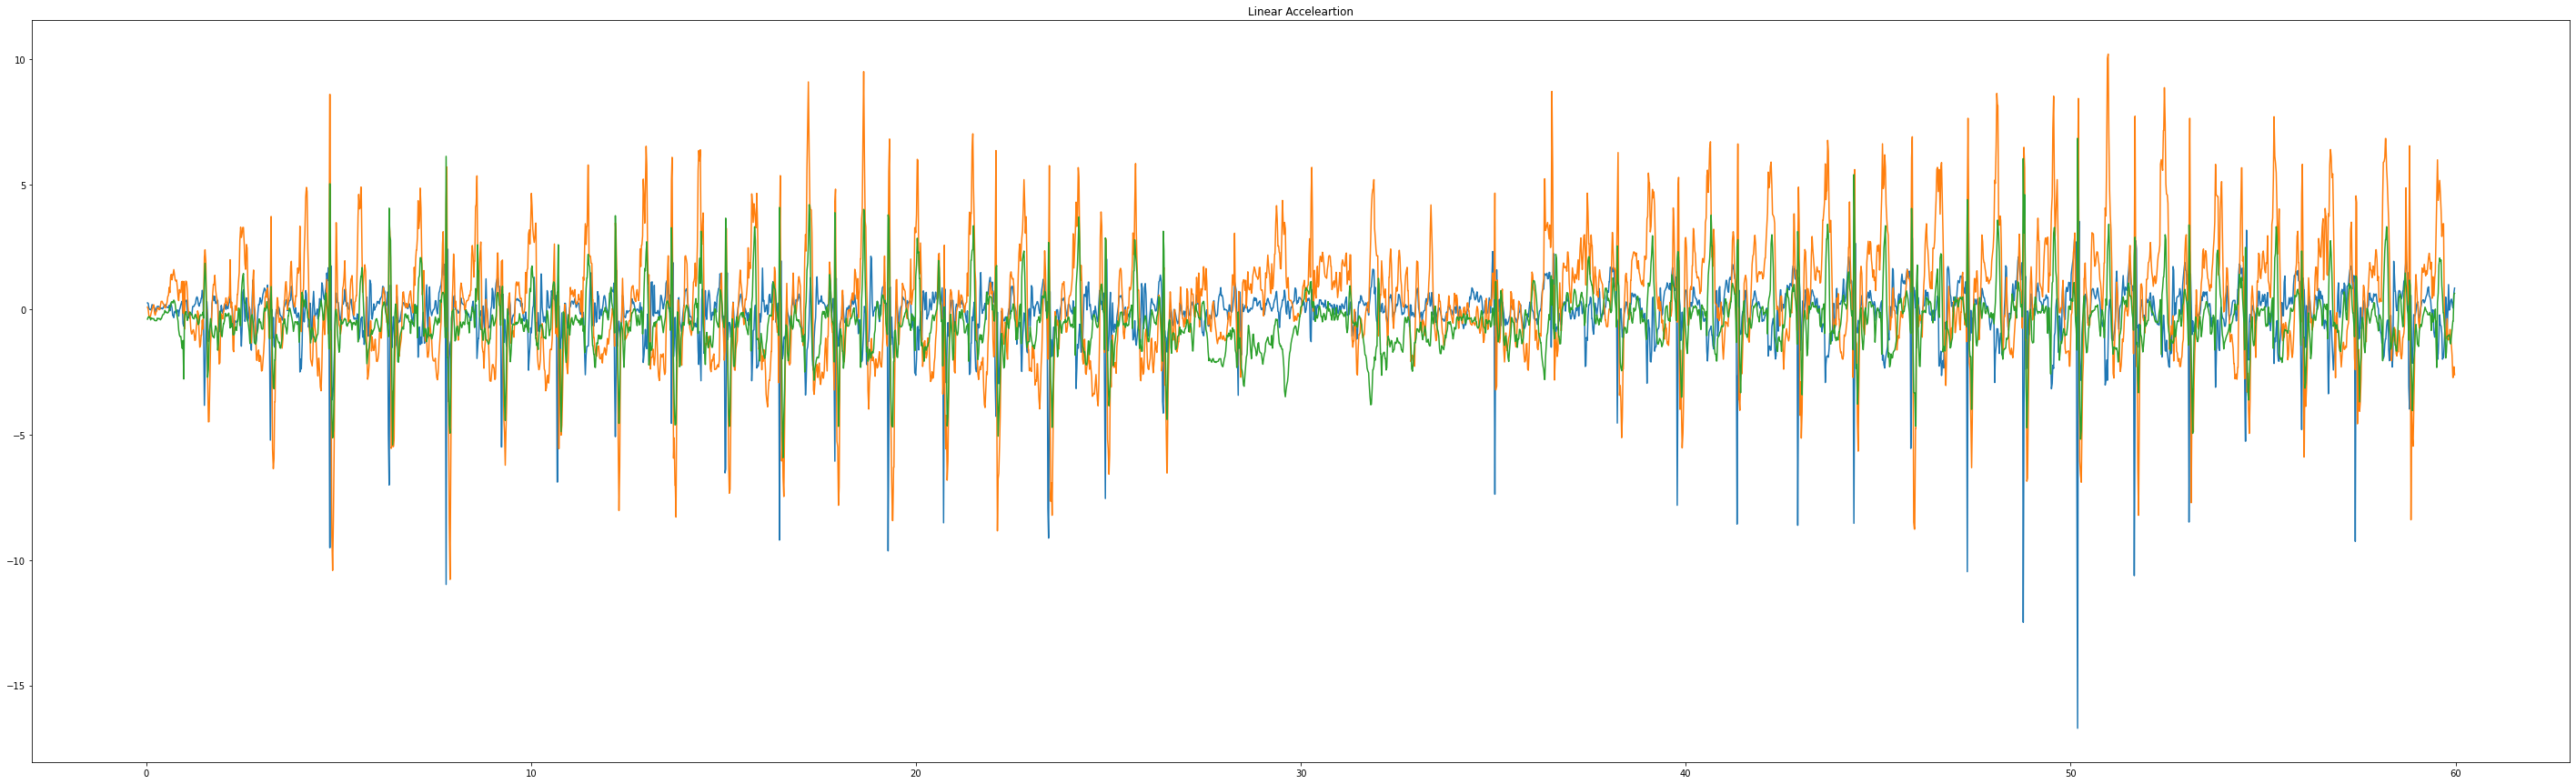

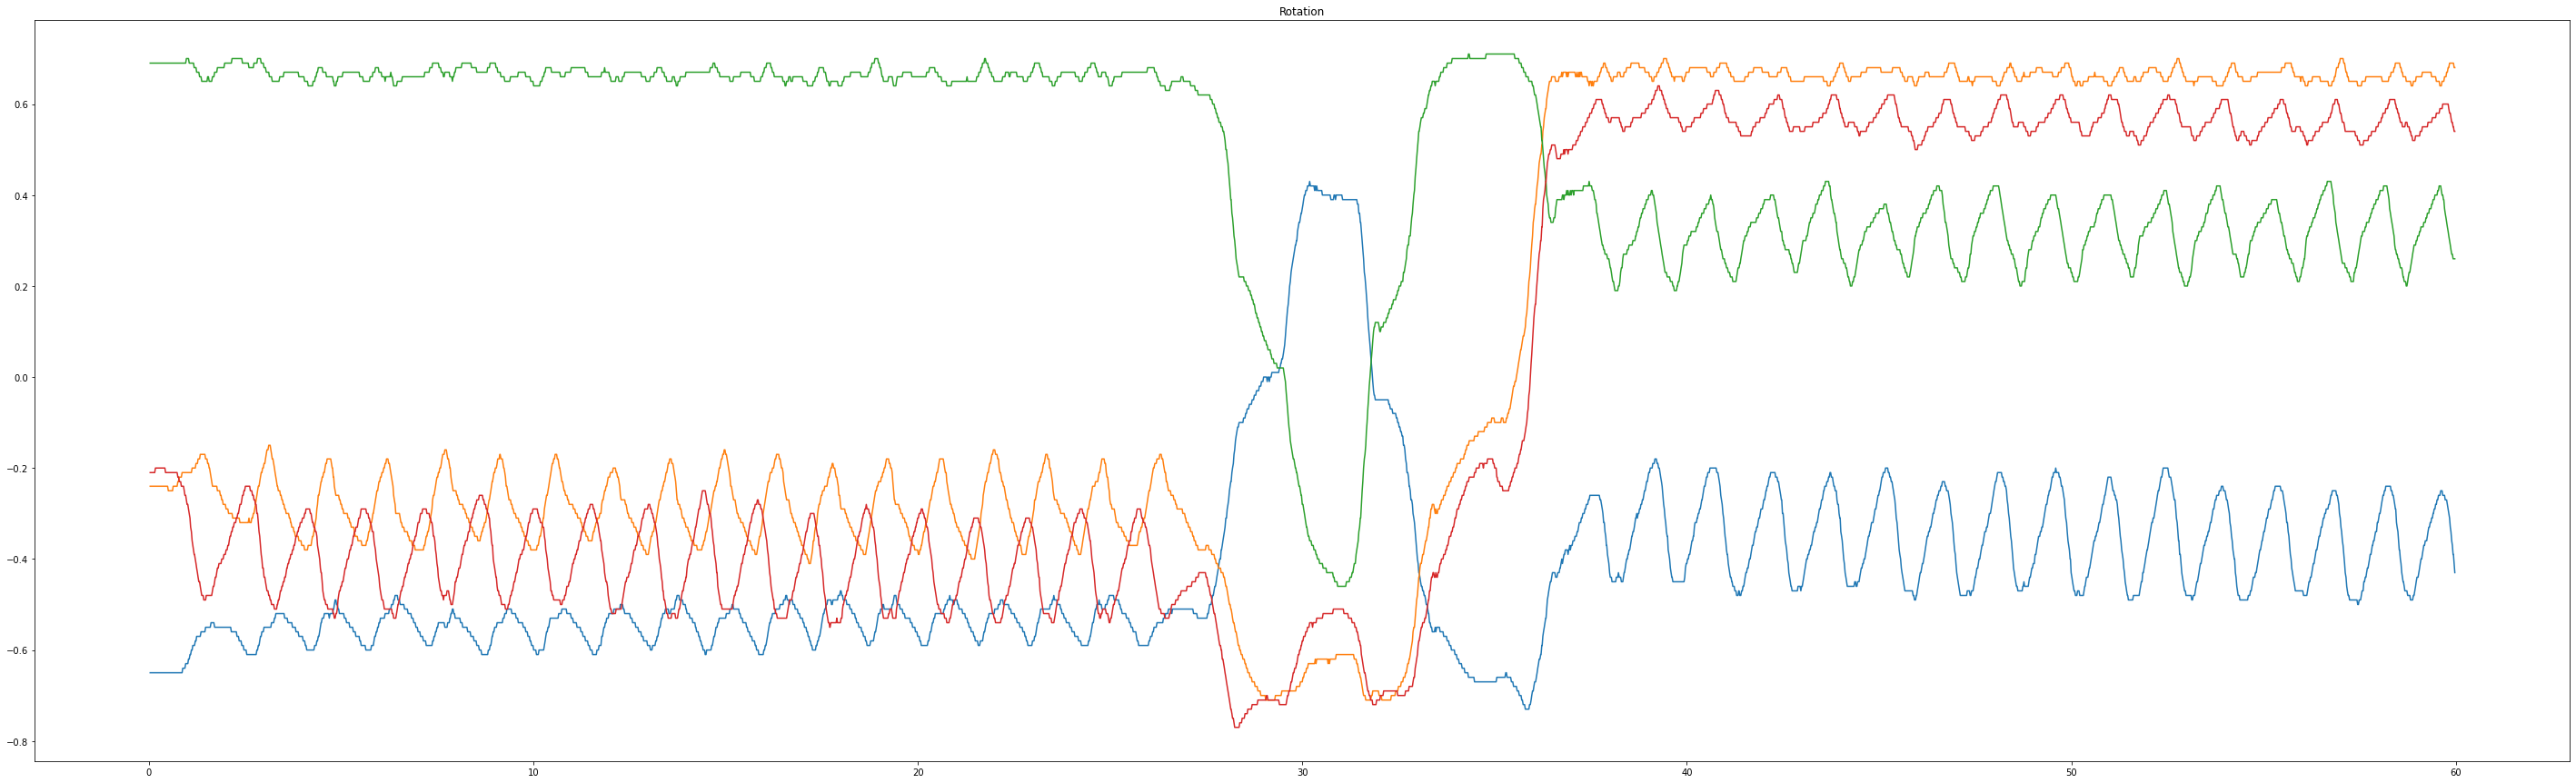

In [182]:
to_plot = -1
figsize = (50, 15)

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['Angle'][:to_plot])
plt.title('Desired Angle')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['grav1'][:to_plot])
plt.plot(time[:to_plot], df['grav2'][:to_plot])
plt.plot(time[:to_plot], df['grav3'][:to_plot])
plt.title('Gravity')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['gyro1'][:to_plot])
plt.plot(time[:to_plot], df['gyro2'][:to_plot])
plt.plot(time[:to_plot], df['gyro3'][:to_plot])
plt.title('Gyro')
plt.figure(figsize=figsize, facecolor=(1,1,1)) # magnet bad
plt.plot(time[:to_plot], df['magnet1'][:to_plot])
plt.plot(time[:to_plot], df['magnet2'][:to_plot])
plt.plot(time[:to_plot], df['magnet3'][:to_plot])
plt.title('Magnet')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['euler1'][:to_plot])
plt.plot(time[:to_plot], df['euler2'][:to_plot])
plt.plot(time[:to_plot], df['euler3'][:to_plot])
plt.title('Euler')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['accl1'][:to_plot])
plt.plot(time[:to_plot], df['accl2'][:to_plot])
plt.plot(time[:to_plot], df['accl3'][:to_plot])
plt.title('Acceleration')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['linaccl1'][:to_plot])
plt.plot(time[:to_plot], df['linaccl2'][:to_plot])
plt.plot(time[:to_plot], df['linaccl3'][:to_plot])
plt.title('Linear Acceleartion')
plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(time[:to_plot], df['quat1'][:to_plot])
plt.plot(time[:to_plot], df['quat2'][:to_plot])
plt.plot(time[:to_plot], df['quat3'][:to_plot])
plt.plot(time[:to_plot], df['quat4'][:to_plot])
plt.title('Rotation')


# Data Cleaning

In [62]:
feats_to_use = ['Angle','grav1','grav2','grav3','gyro1','gyro2','gyro3','euler1','euler2','euler3','accl1','accl2','accl3']
data_arr = np.array(df[feats_to_use])
y = data_arr[:,0]
X = data_arr[:,1:]
X = preprocessing.scale(X)


## Scaleograms

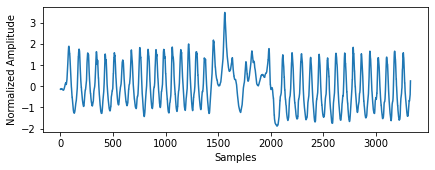

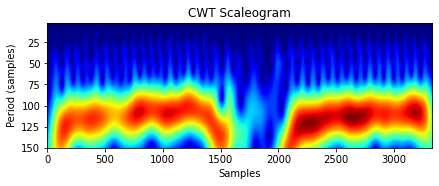

In [63]:
# Visualize using pywt

feat = 2

scales = np.arange(2, f*2)
coefs, freqs = pywt.cwt(X[:,feat], scales, 'cmor-1-1')
coefs = np.abs(coefs)
plt.figure(figsize=(6.9,2.3))
plt.plot(X[:,feat])
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')

plt.figure(figsize=(6.9,2.3))
plt.imshow(coefs, extent=[0, time.size, 150, 2], cmap='jet', aspect='auto',
            vmax=coefs.max(), vmin=-coefs.min())
plt.title('CWT Scaleogram')
plt.xlabel('Samples')
plt.ylabel('Period (samples)')
plt.show() 

## Dimensionality Reduction

In [100]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde

coefs_scaled = preprocessing.scale(coefs[25:50,:].T)

coefs_reduced = PCA(n_components=8).fit_transform(coefs_scaled)
coefs_embedded = TSNE(n_components=2, perplexity=50, verbose=True).fit_transform(coefs_reduced)



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3332 samples in 0.004s...
[t-SNE] Computed neighbors for 3332 samples in 0.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3332
[t-SNE] Computed conditional probabilities for sample 2000 / 3332
[t-SNE] Computed conditional probabilities for sample 3000 / 3332
[t-SNE] Computed conditional probabilities for sample 3332 / 3332
[t-SNE] Mean sigma: 0.595063
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.126938
[t-SNE] KL divergence after 1000 iterations: 0.836990


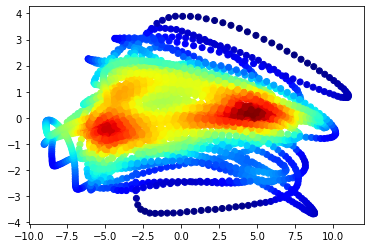

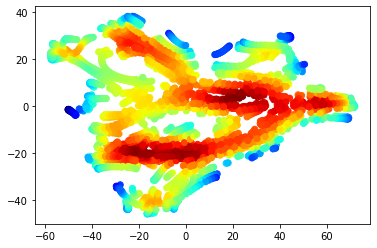

In [101]:

xy = np.vstack([coefs_reduced[:,0], coefs_reduced[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_reduced[:,0], coefs_reduced[:,1], c=z, cmap='jet')

xy = np.vstack([coefs_embedded[:,0], coefs_embedded[:,1]])
z = gaussian_kde(xy)(xy)
plt.figure()
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=z, cmap='jet')


## Identifying gait phase using KMeans

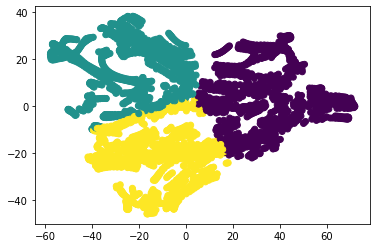

In [103]:
# Kmeans
from sklearn.cluster import KMeans

n_clusters = 3

coefs_pred = KMeans(n_clusters=n_clusters).fit_predict(coefs_embedded)
plt.scatter(coefs_embedded[:,0], coefs_embedded[:,1], c=coefs_pred)

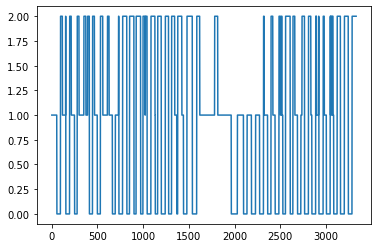

In [104]:
plt.plot(coefs_pred[:])

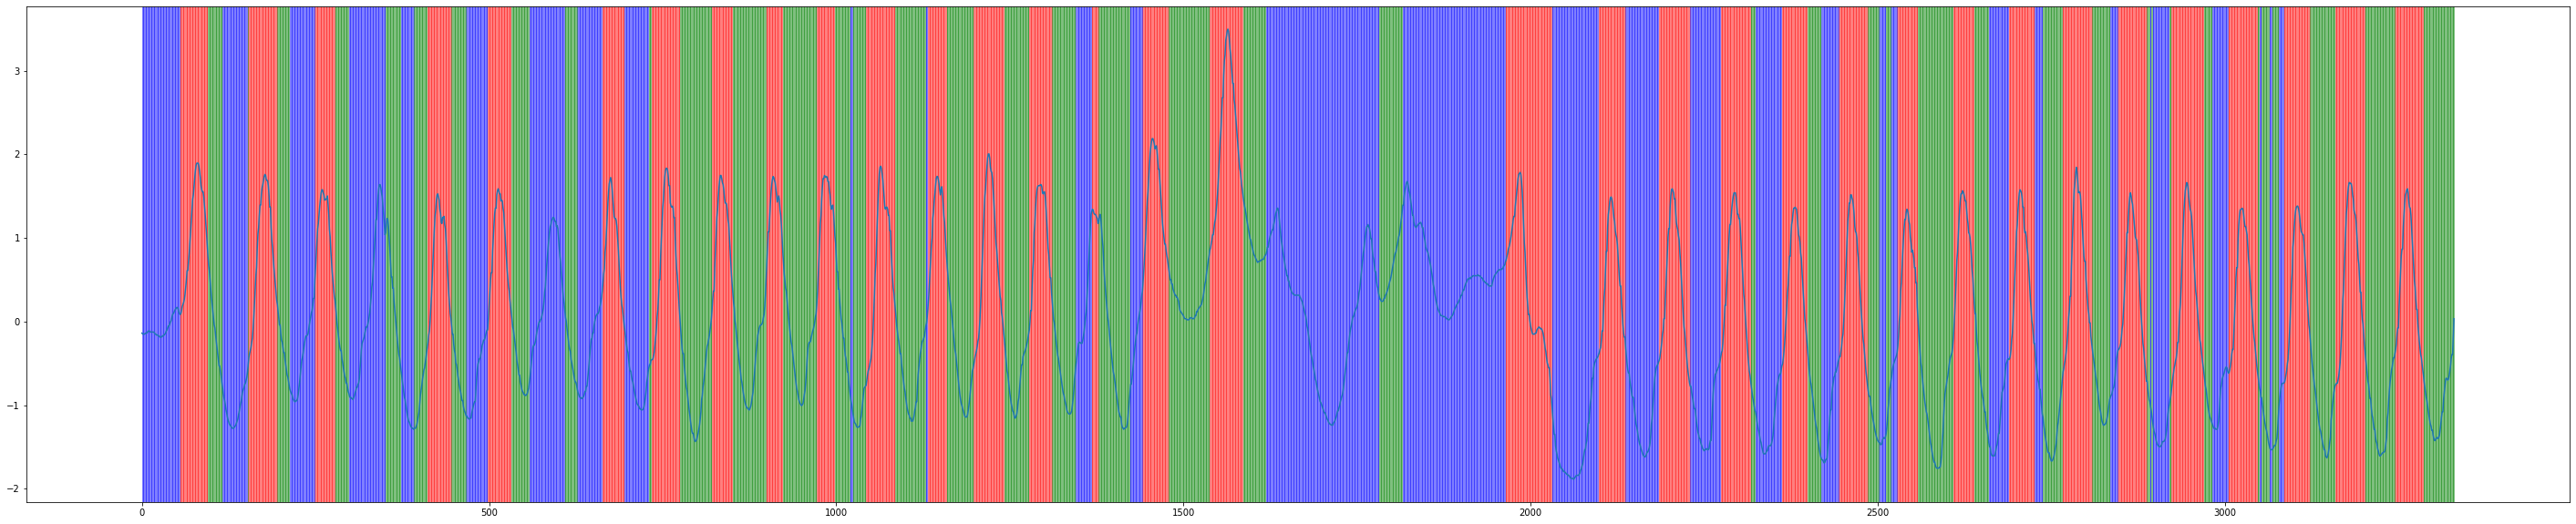

In [105]:
to_plot = -1


colors = ['r','b','g','m','y','k','r']*30
plt.figure(figsize=(50,10))
plt.plot(X[:,2][:to_plot])
for k in range(n_clusters):
    for i in range(np.where(coefs_pred[:to_plot]==k)[0].size):
        plt.axvspan(np.where(coefs_pred==k)[0][i], np.where(coefs_pred==k)[0][i], color=colors[k], alpha=0.5)


## Get all data

In [267]:
data_dir = "./ml_data_v2/csv"
data = []

feats_to_use = ['Angle','grav1','grav2','grav3','gyro1','gyro2','gyro3','accl1','accl2','accl3']

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f), index_col=0)
        data.append(df[feats_to_use])
        
df = data[0]
for d in data[1:]:
    df = df.append(d)


## Apply high-pass filter

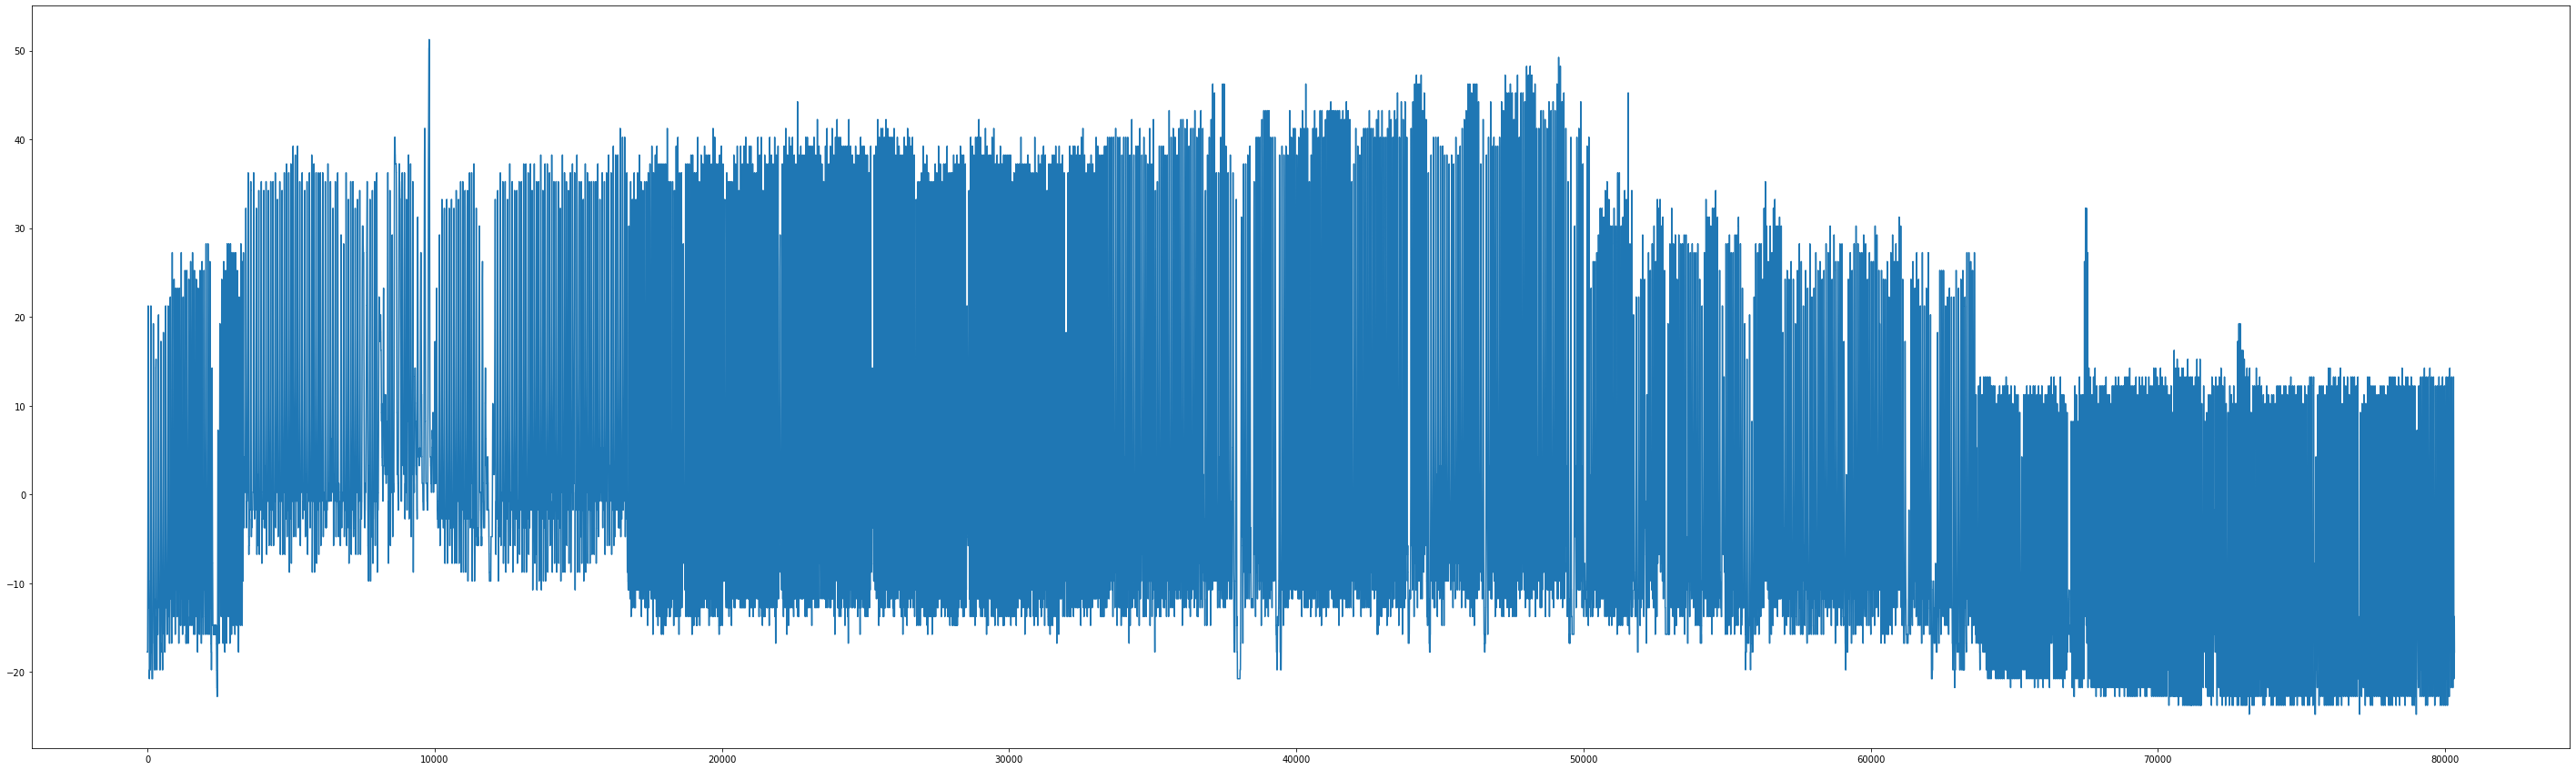

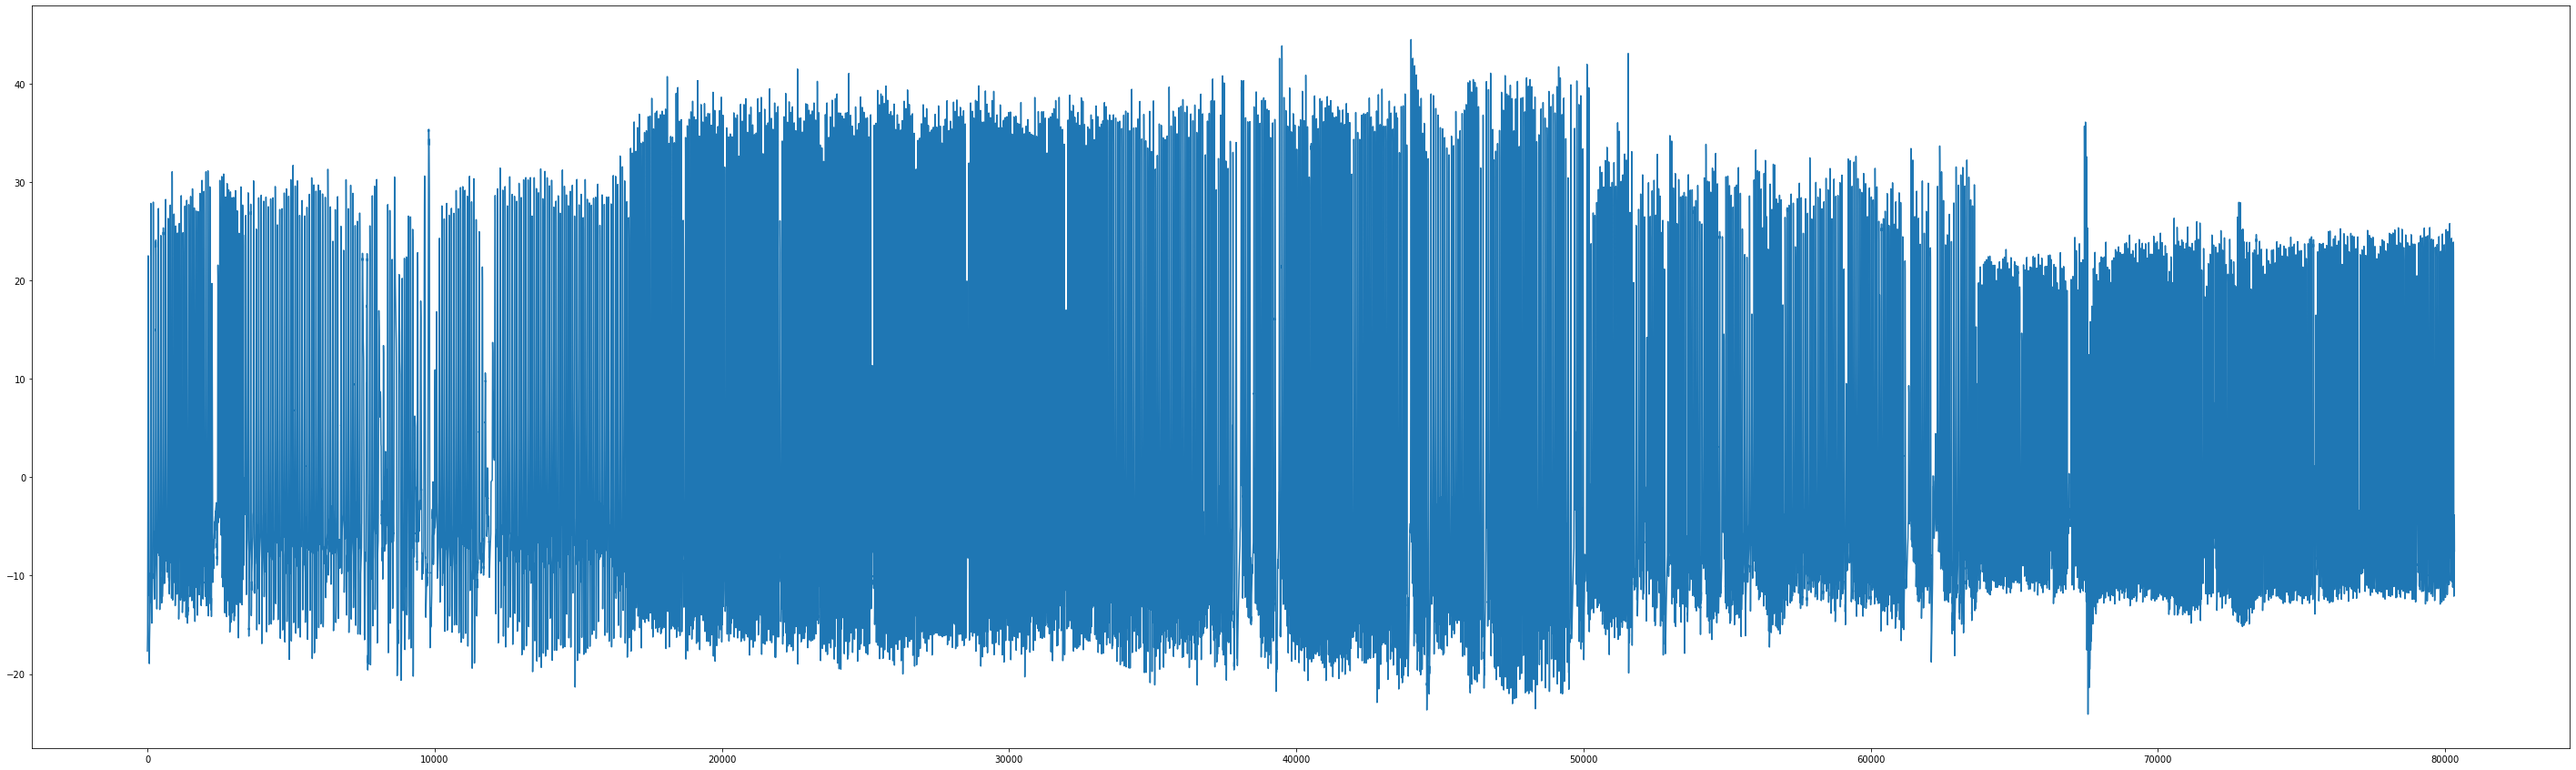

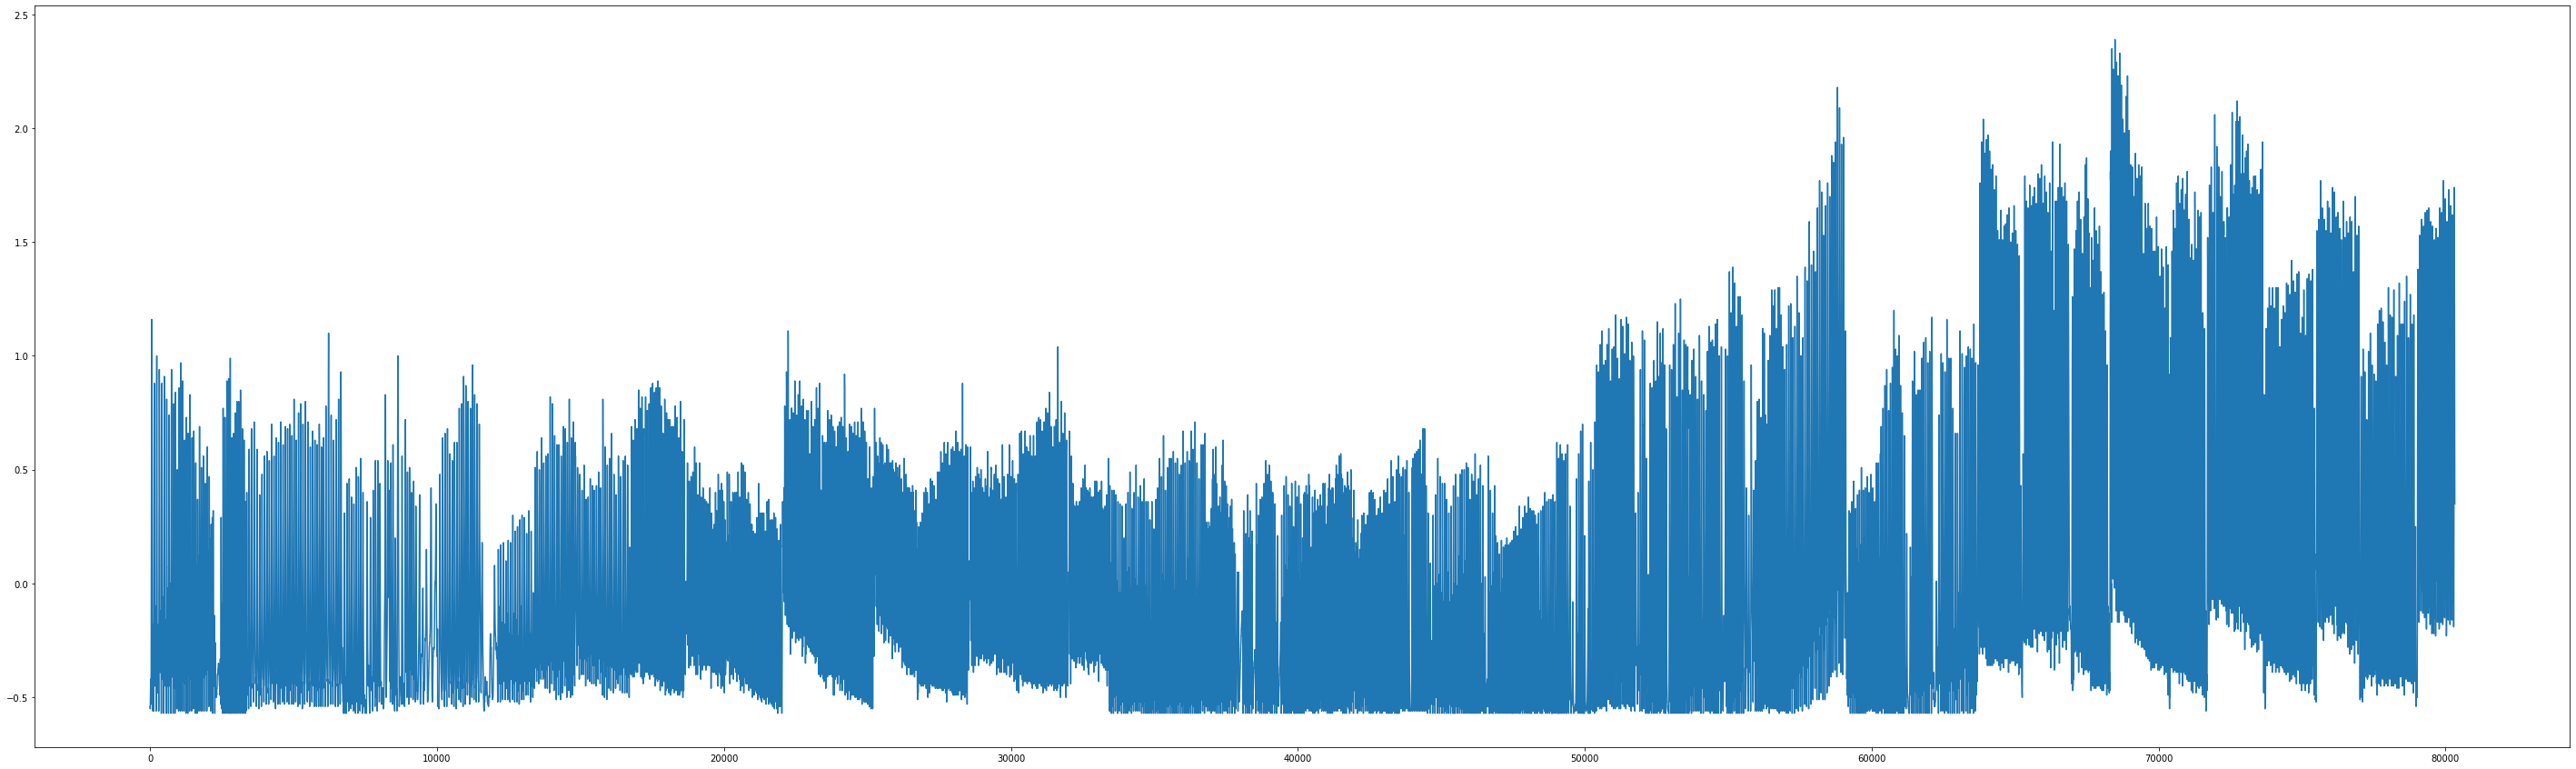

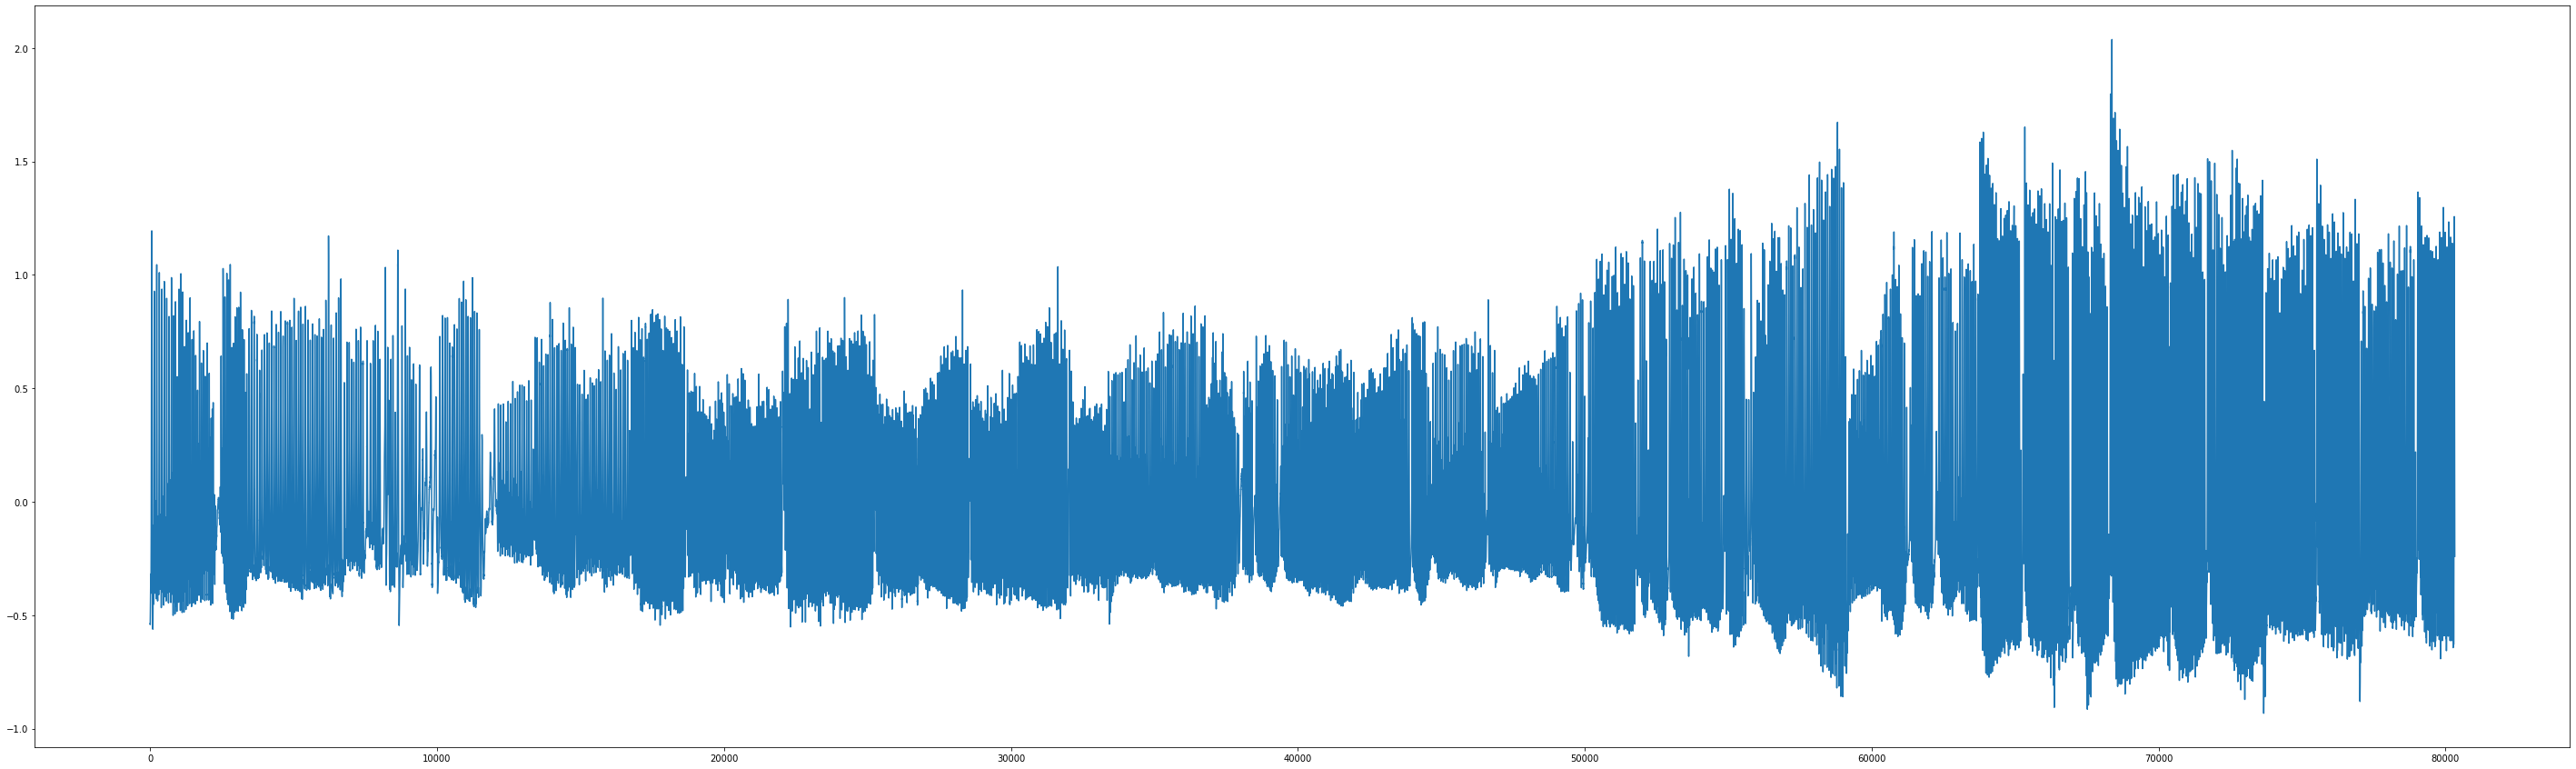

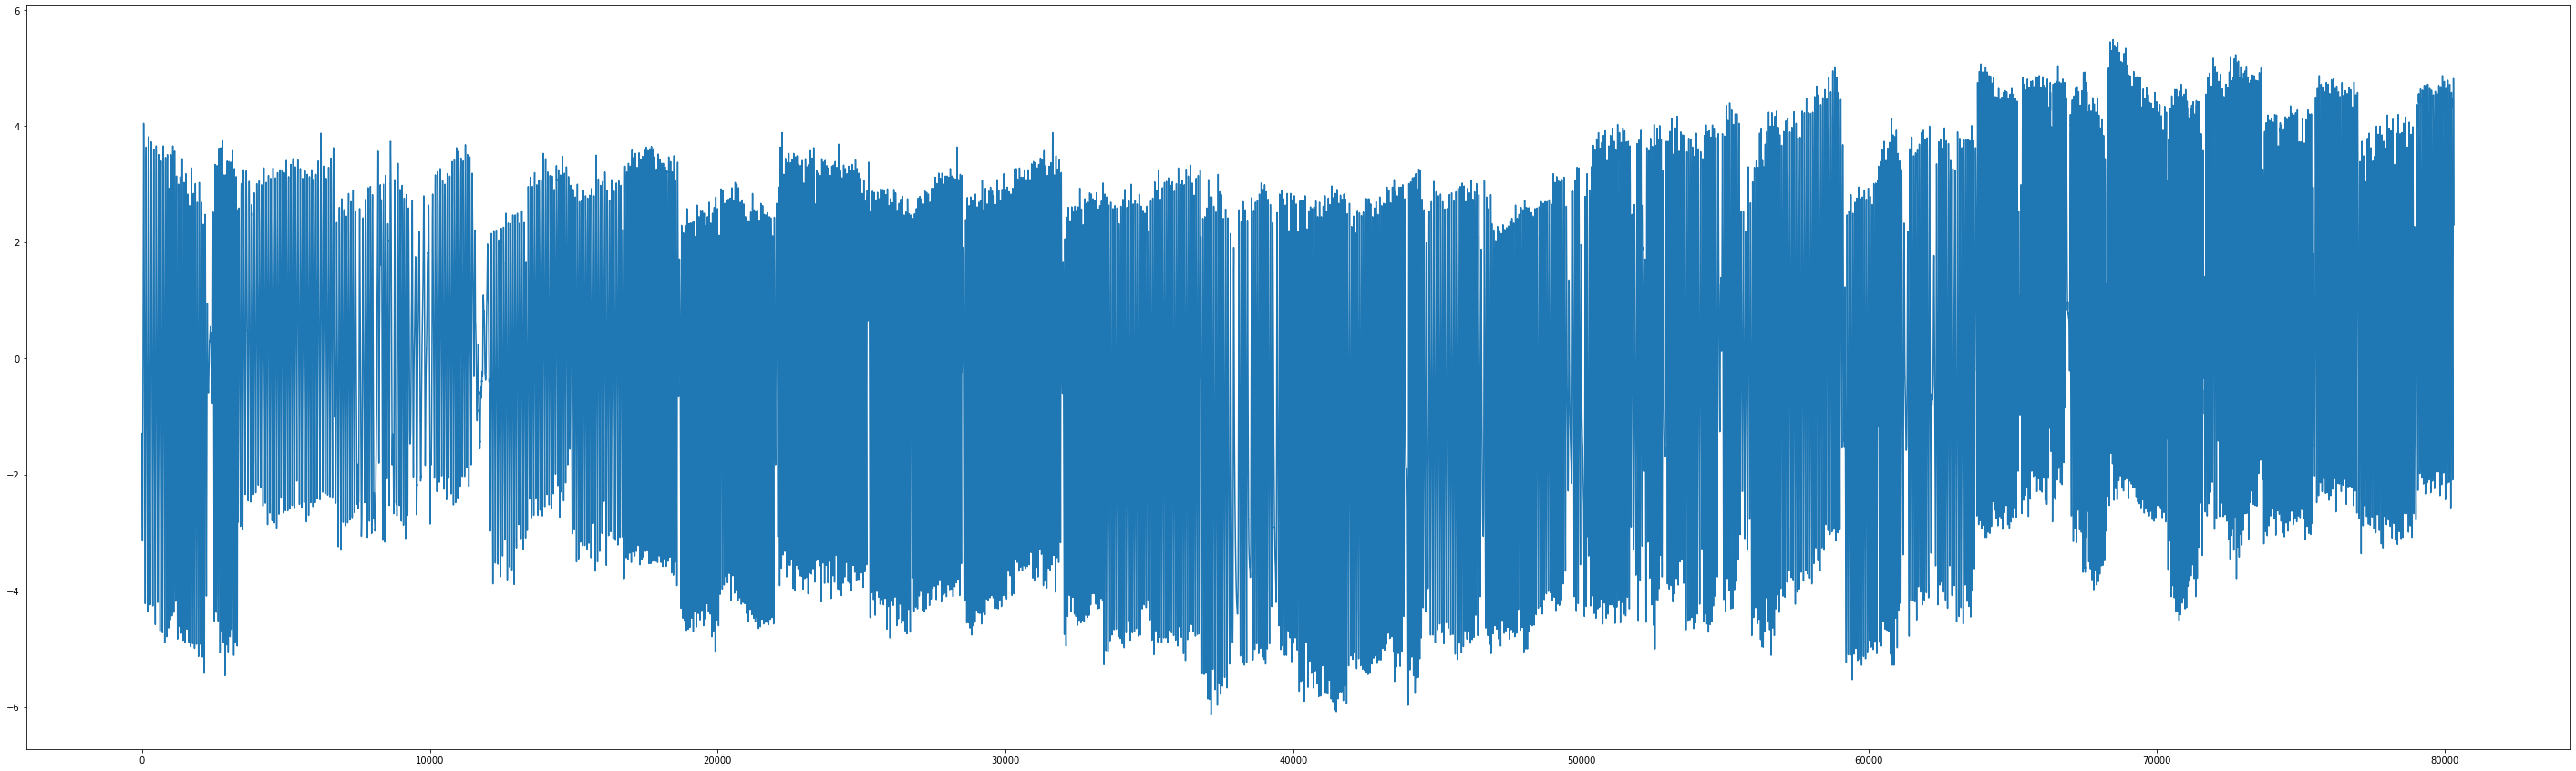

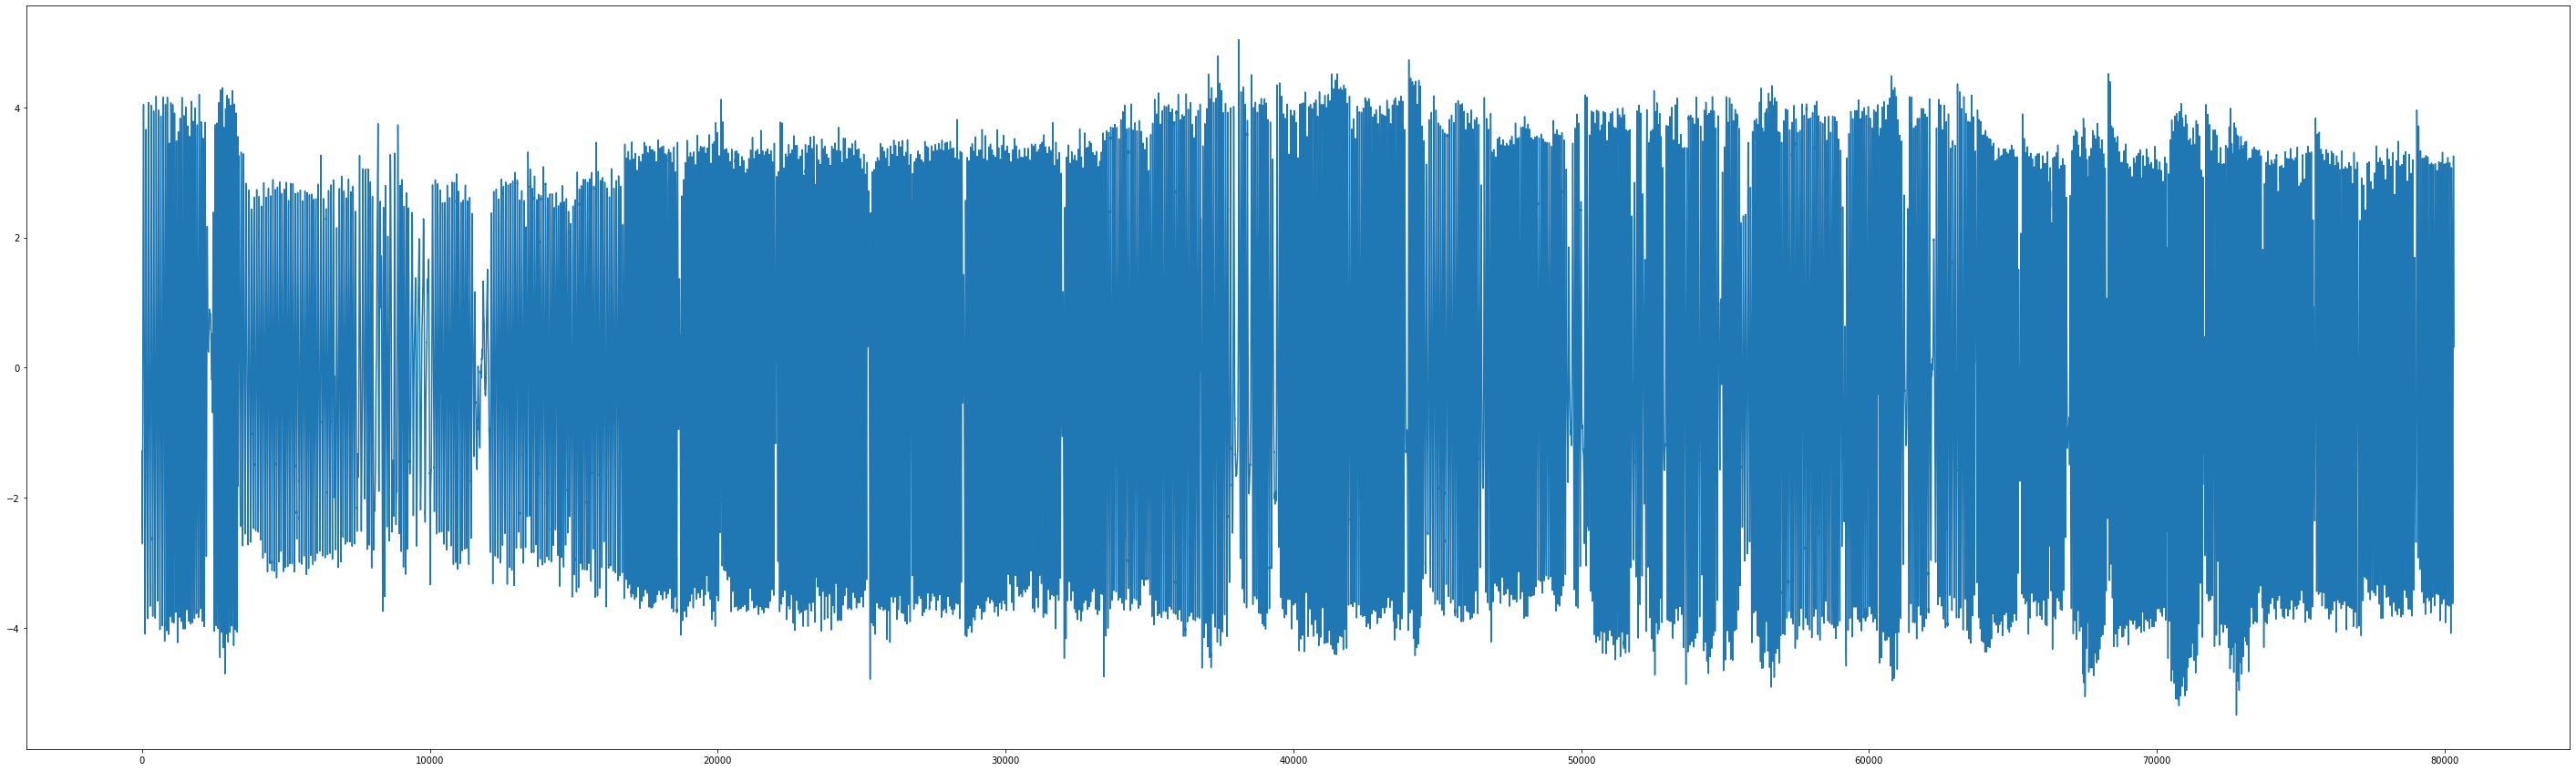

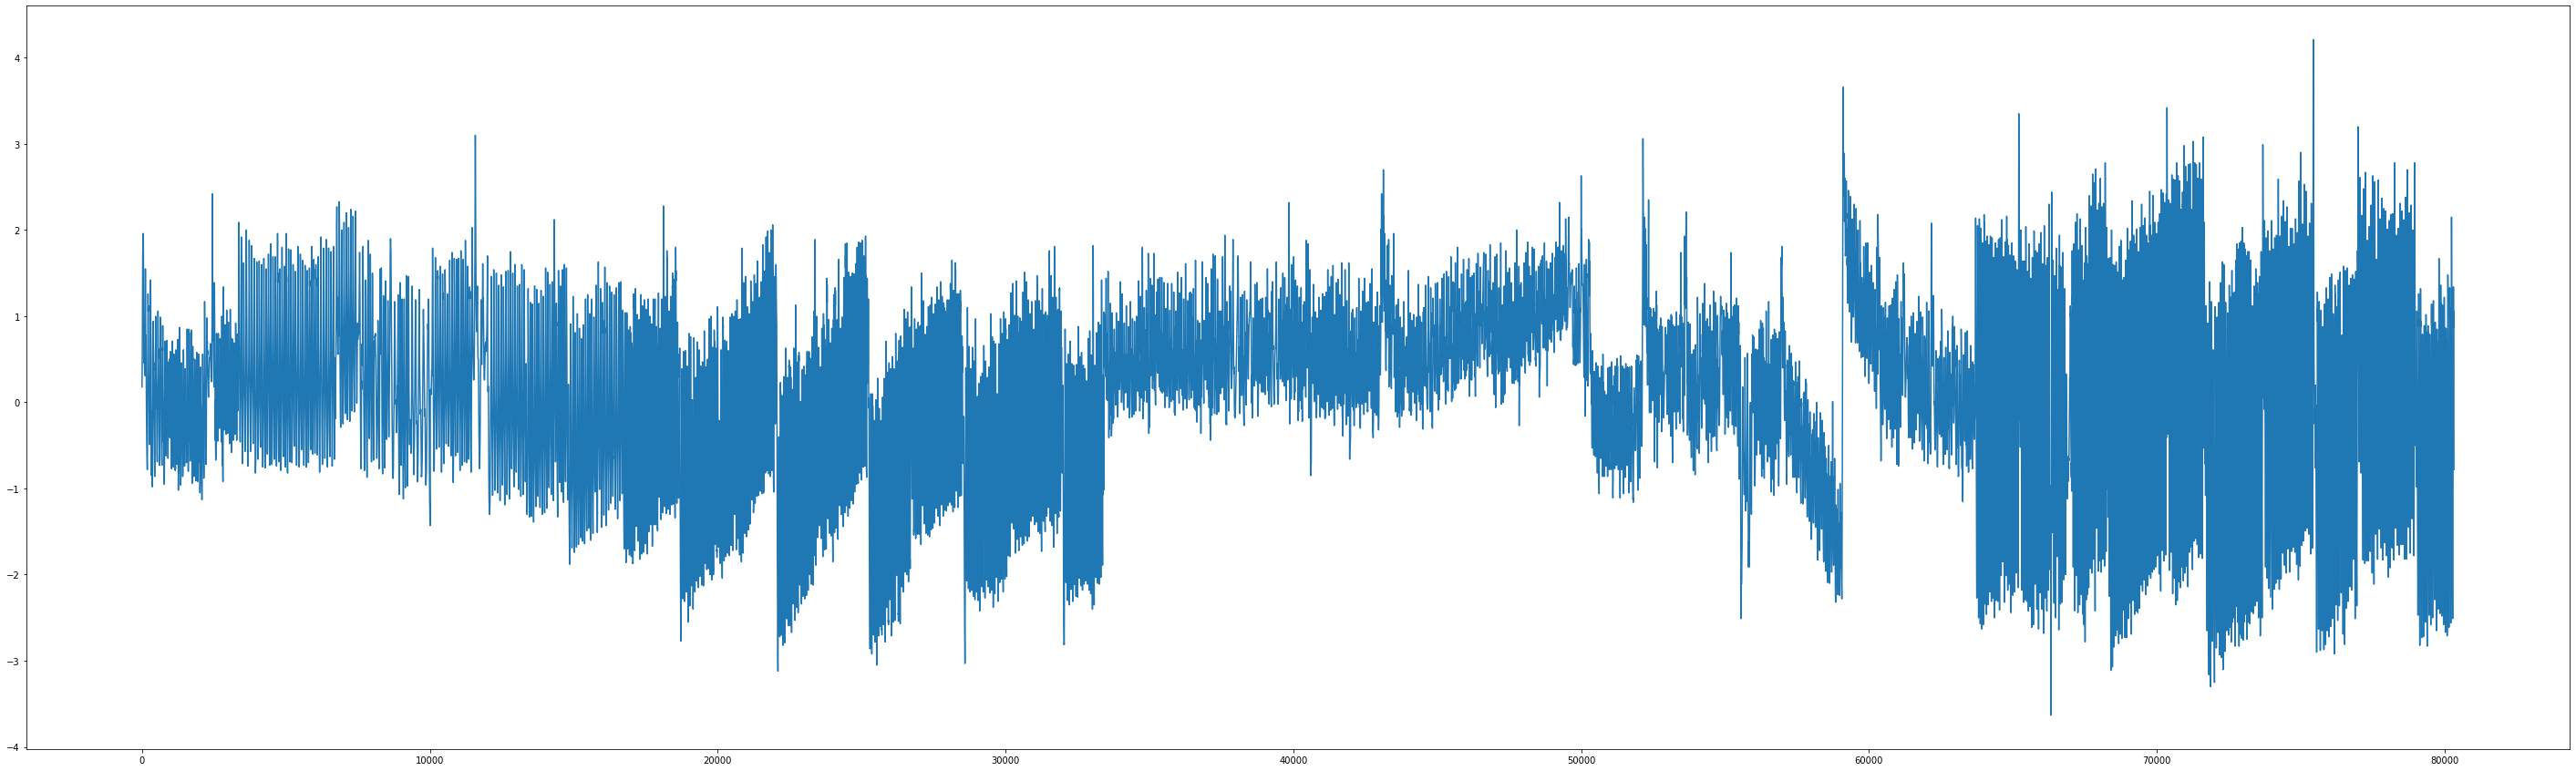

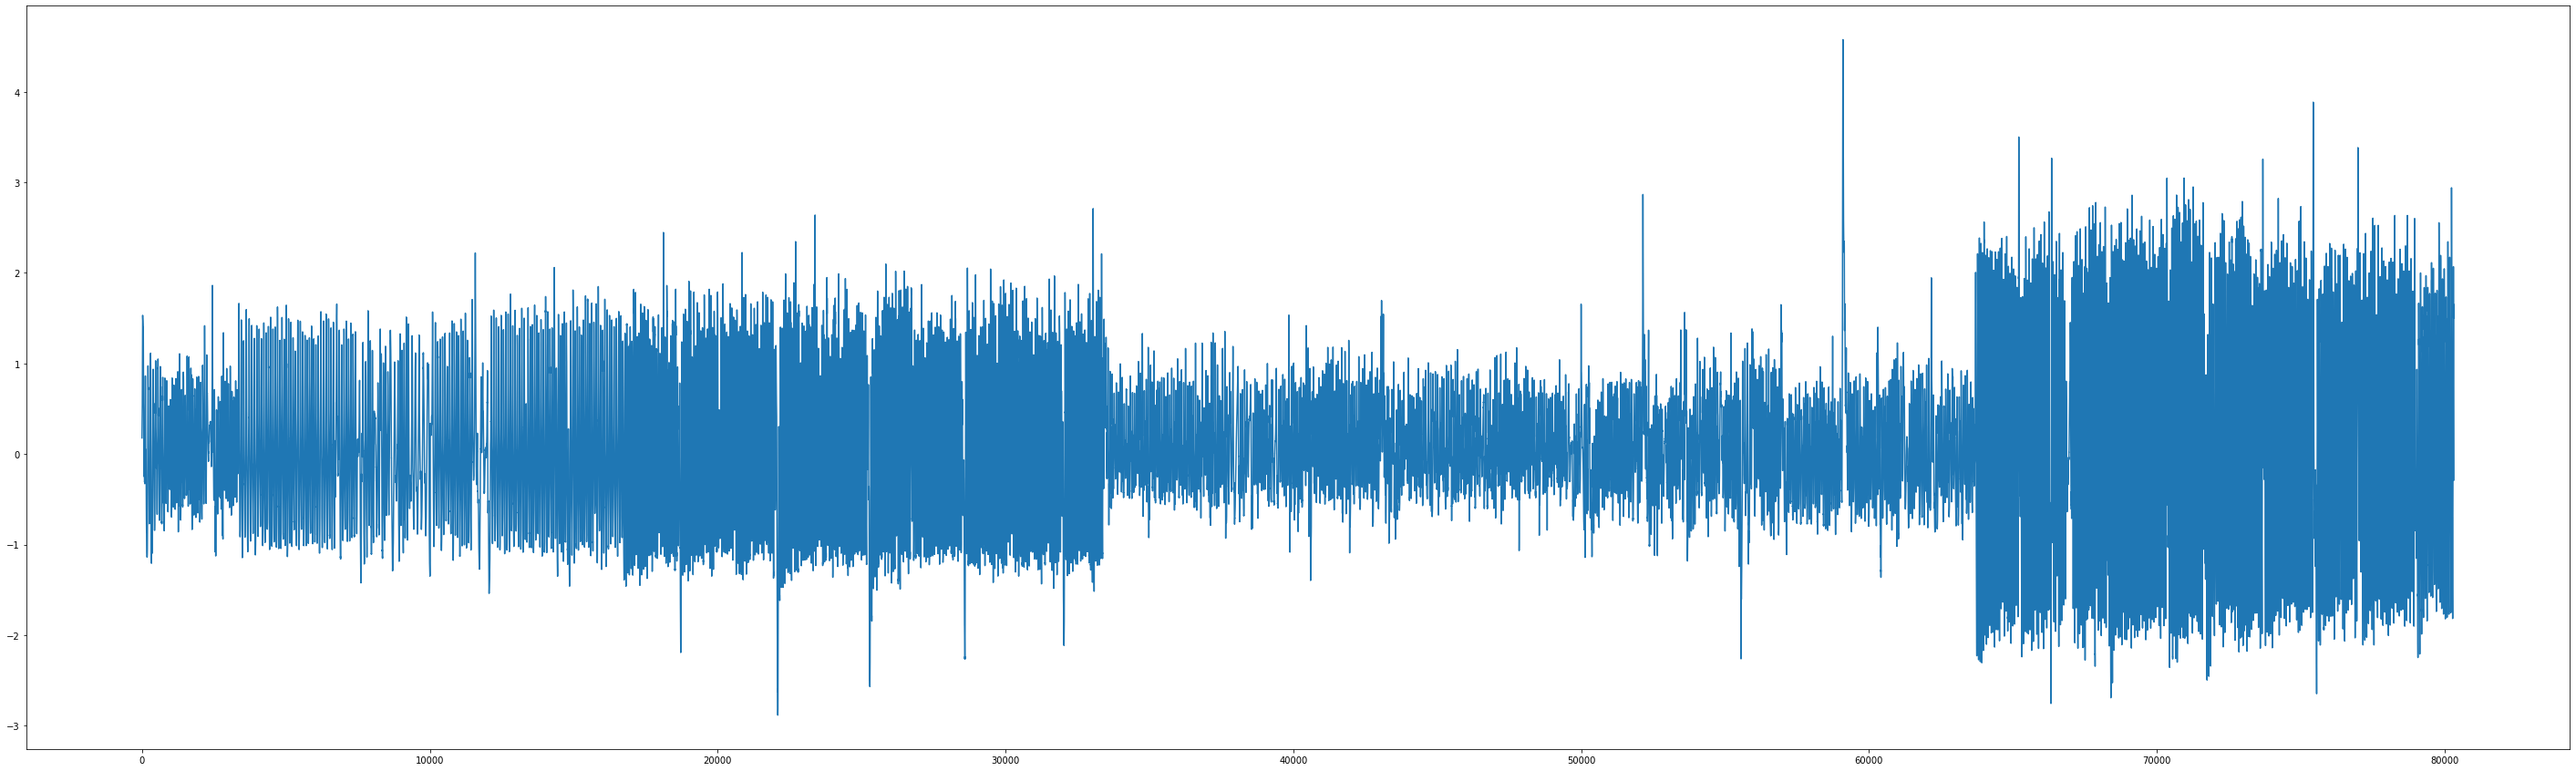

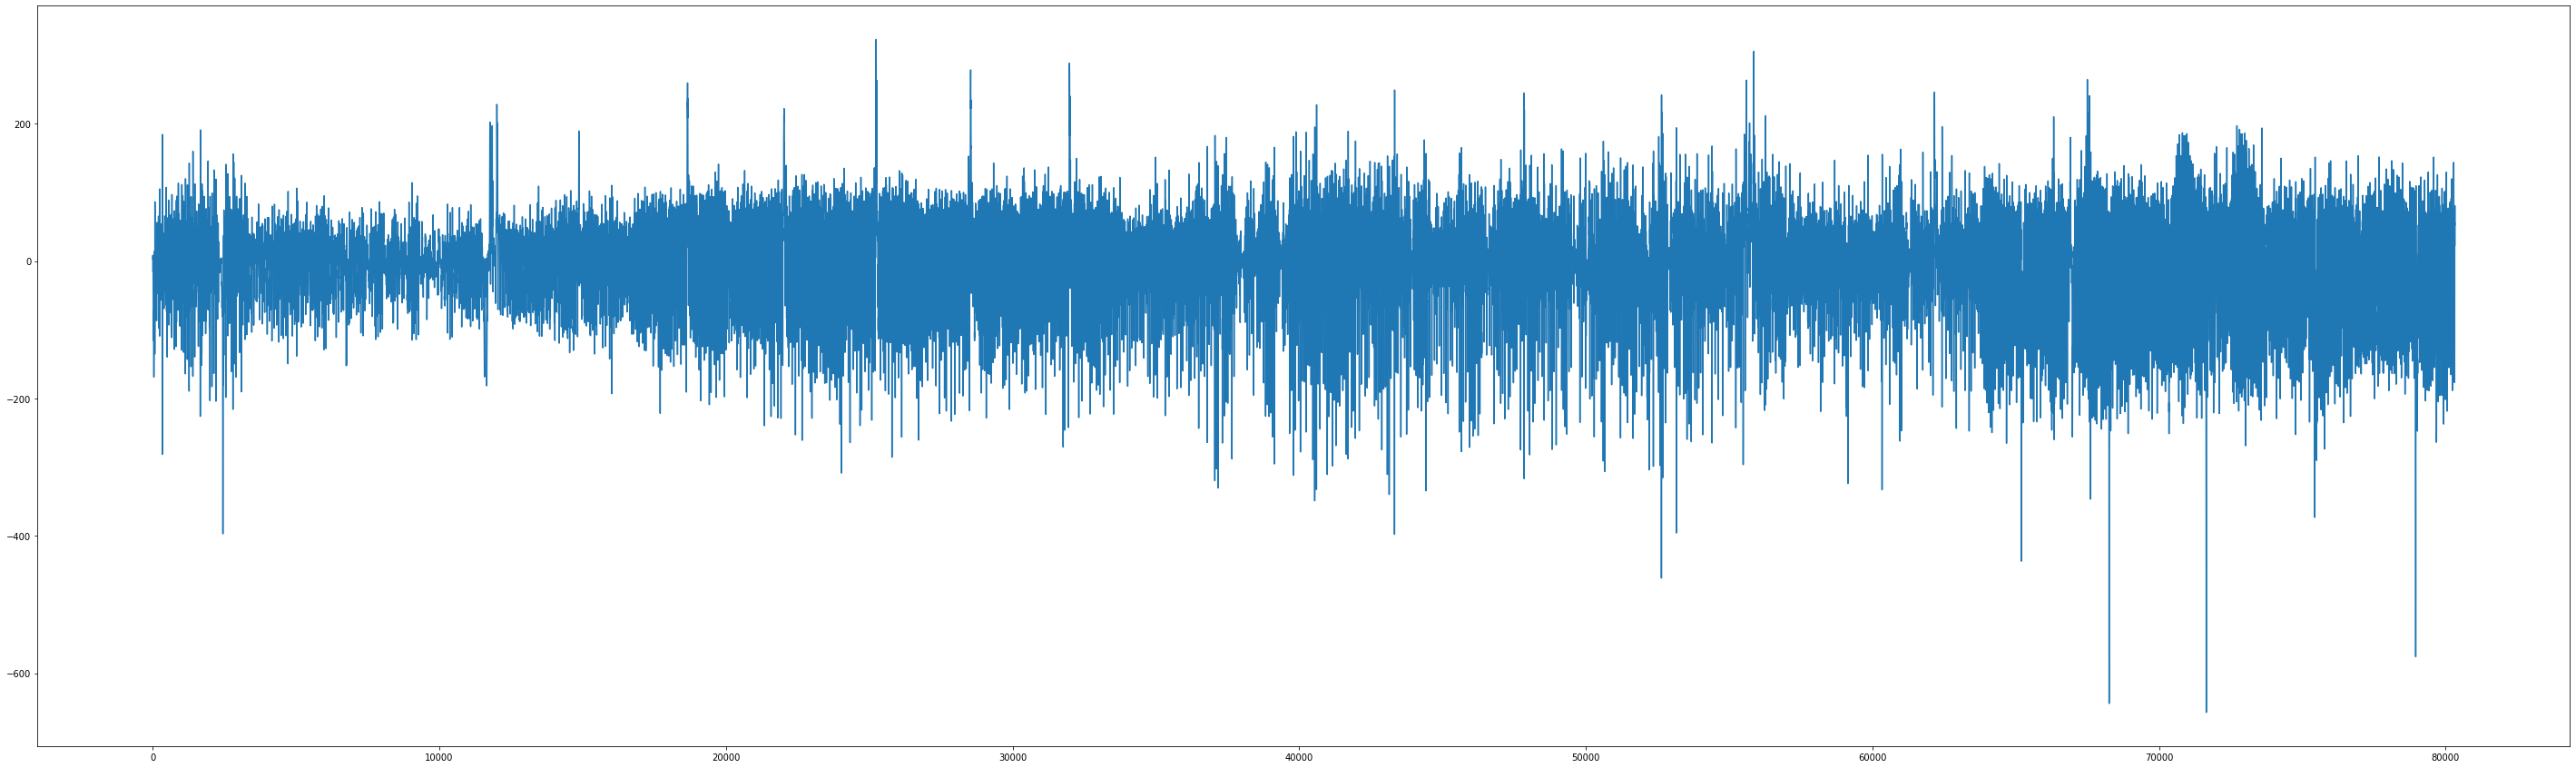

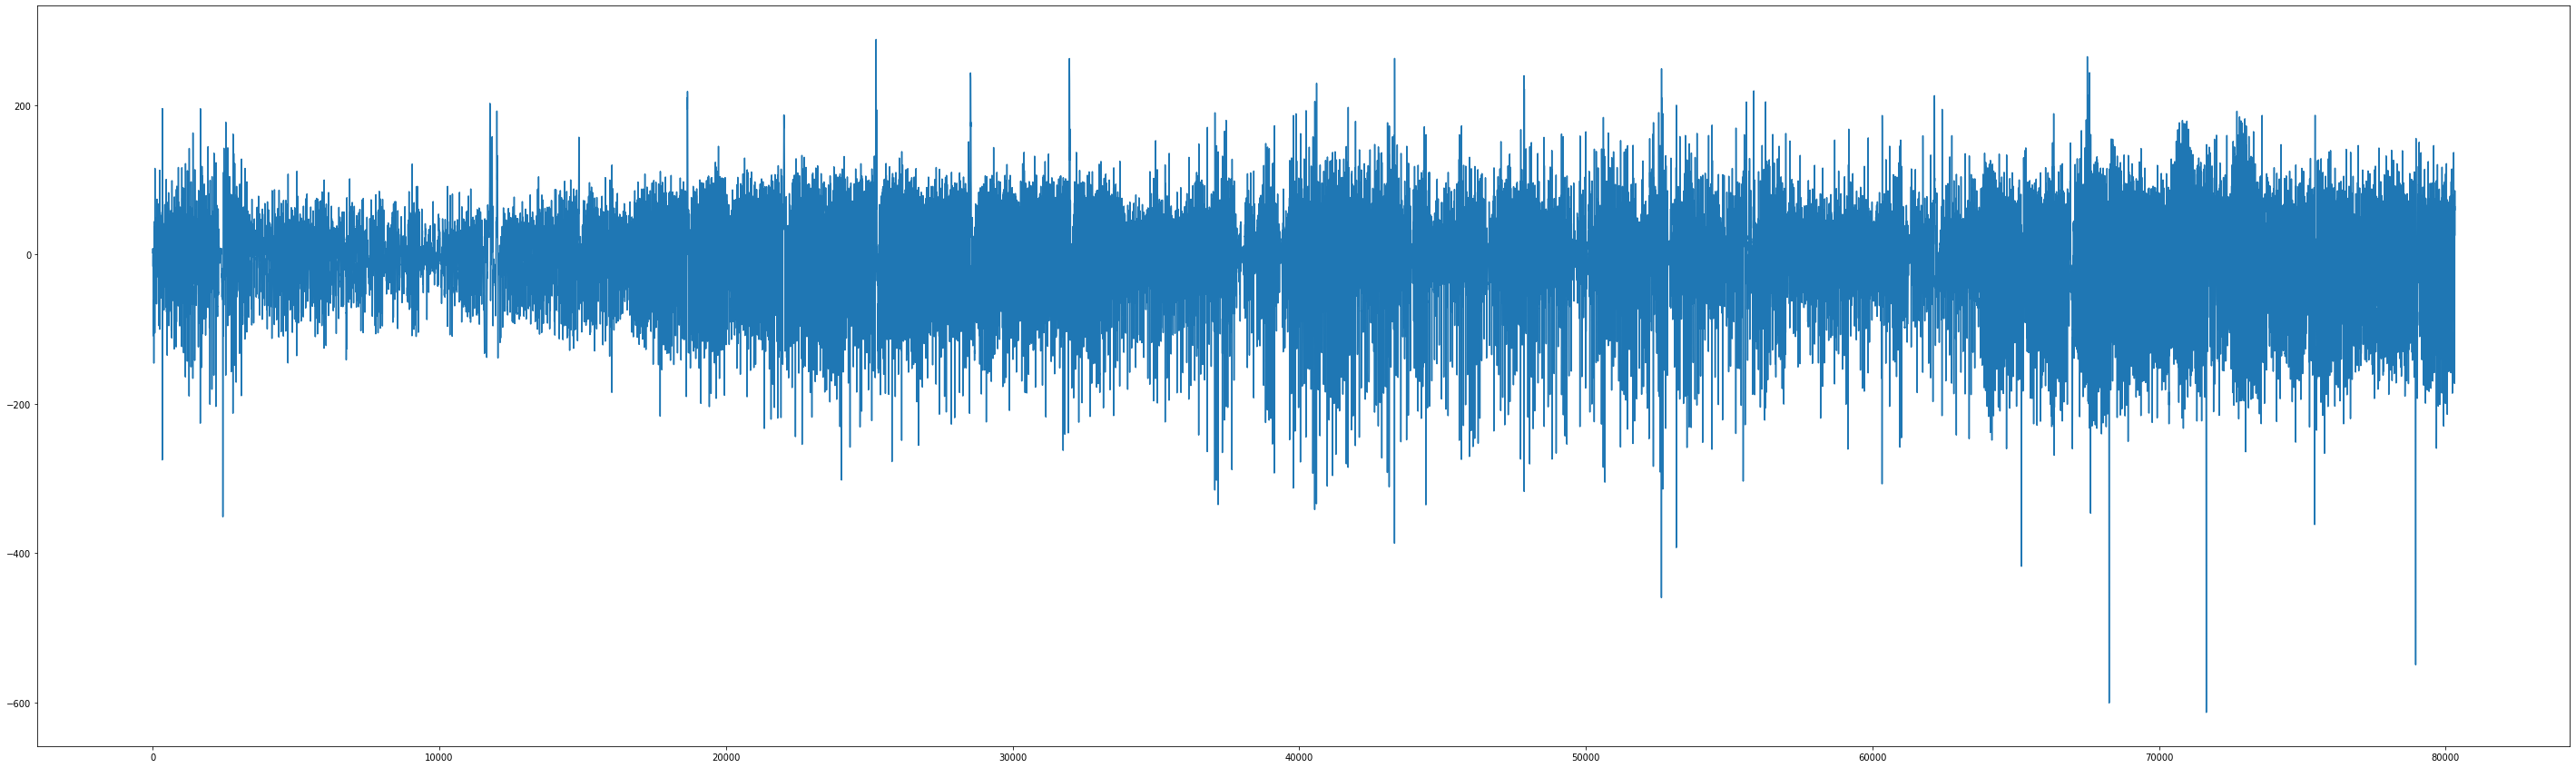

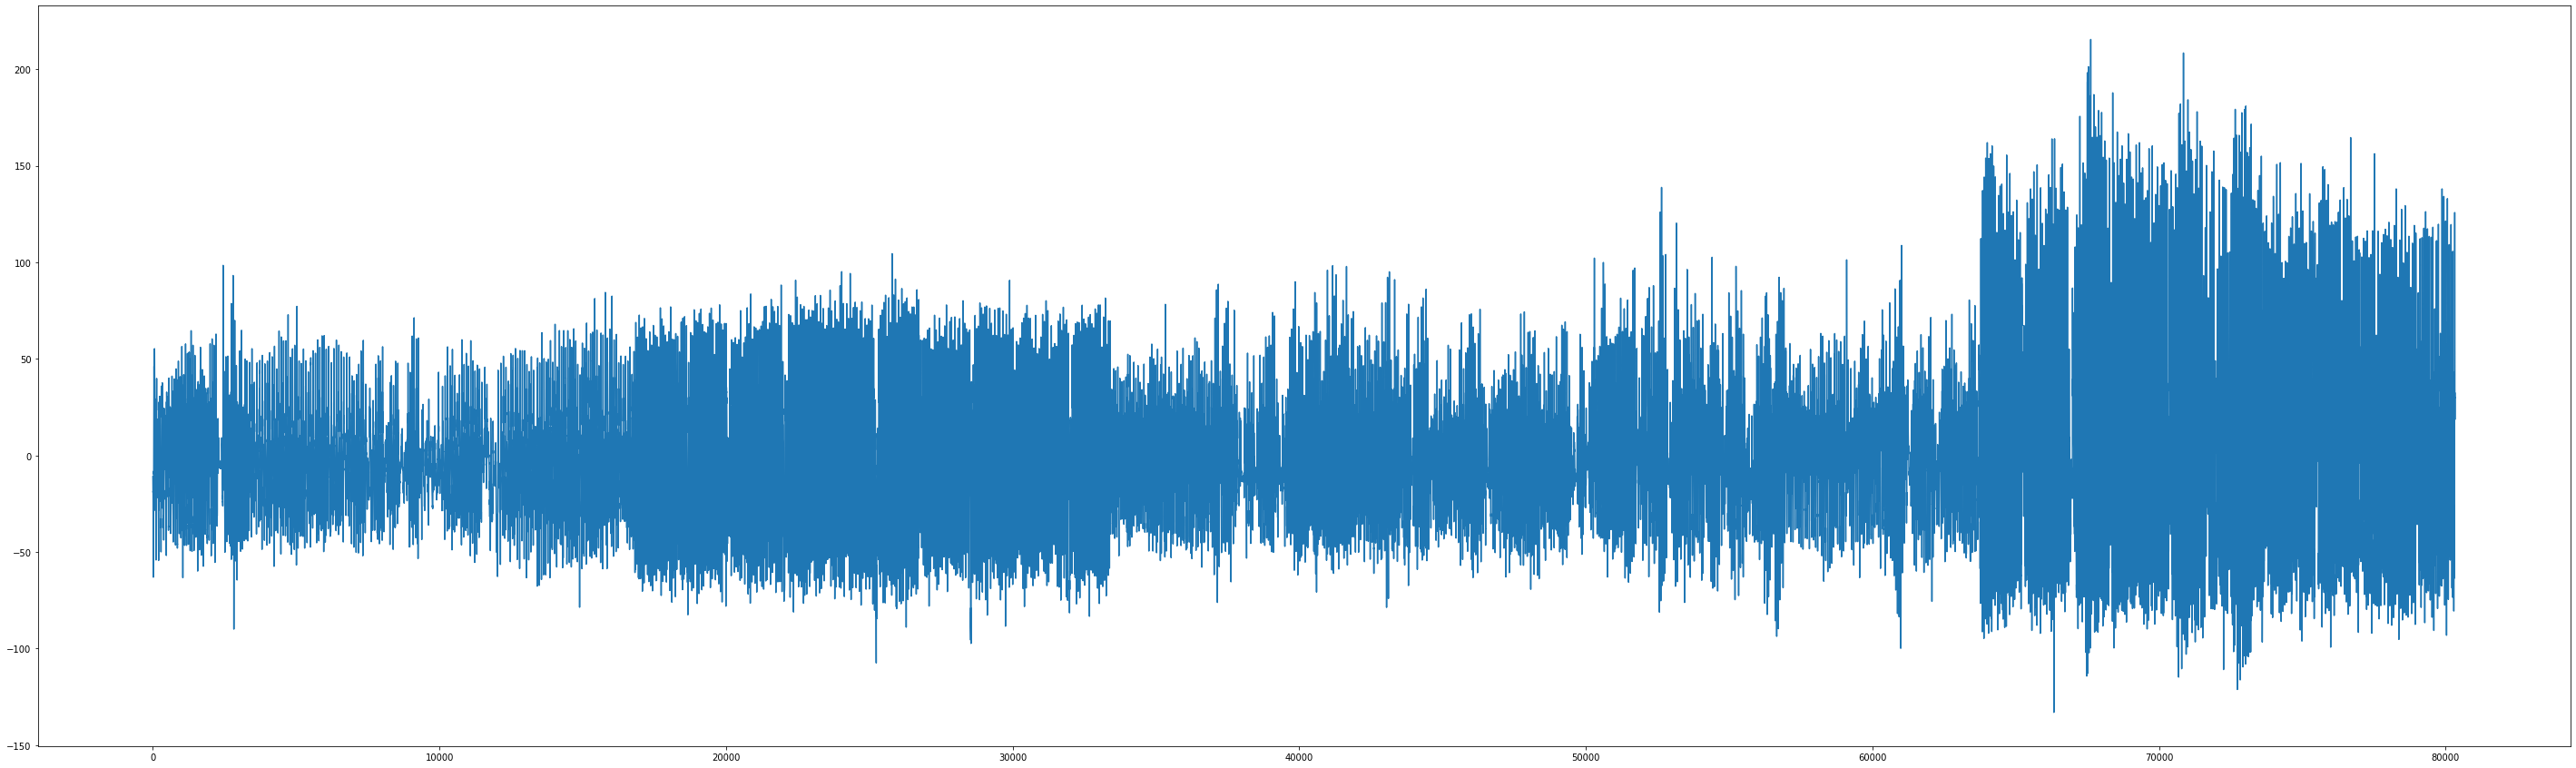

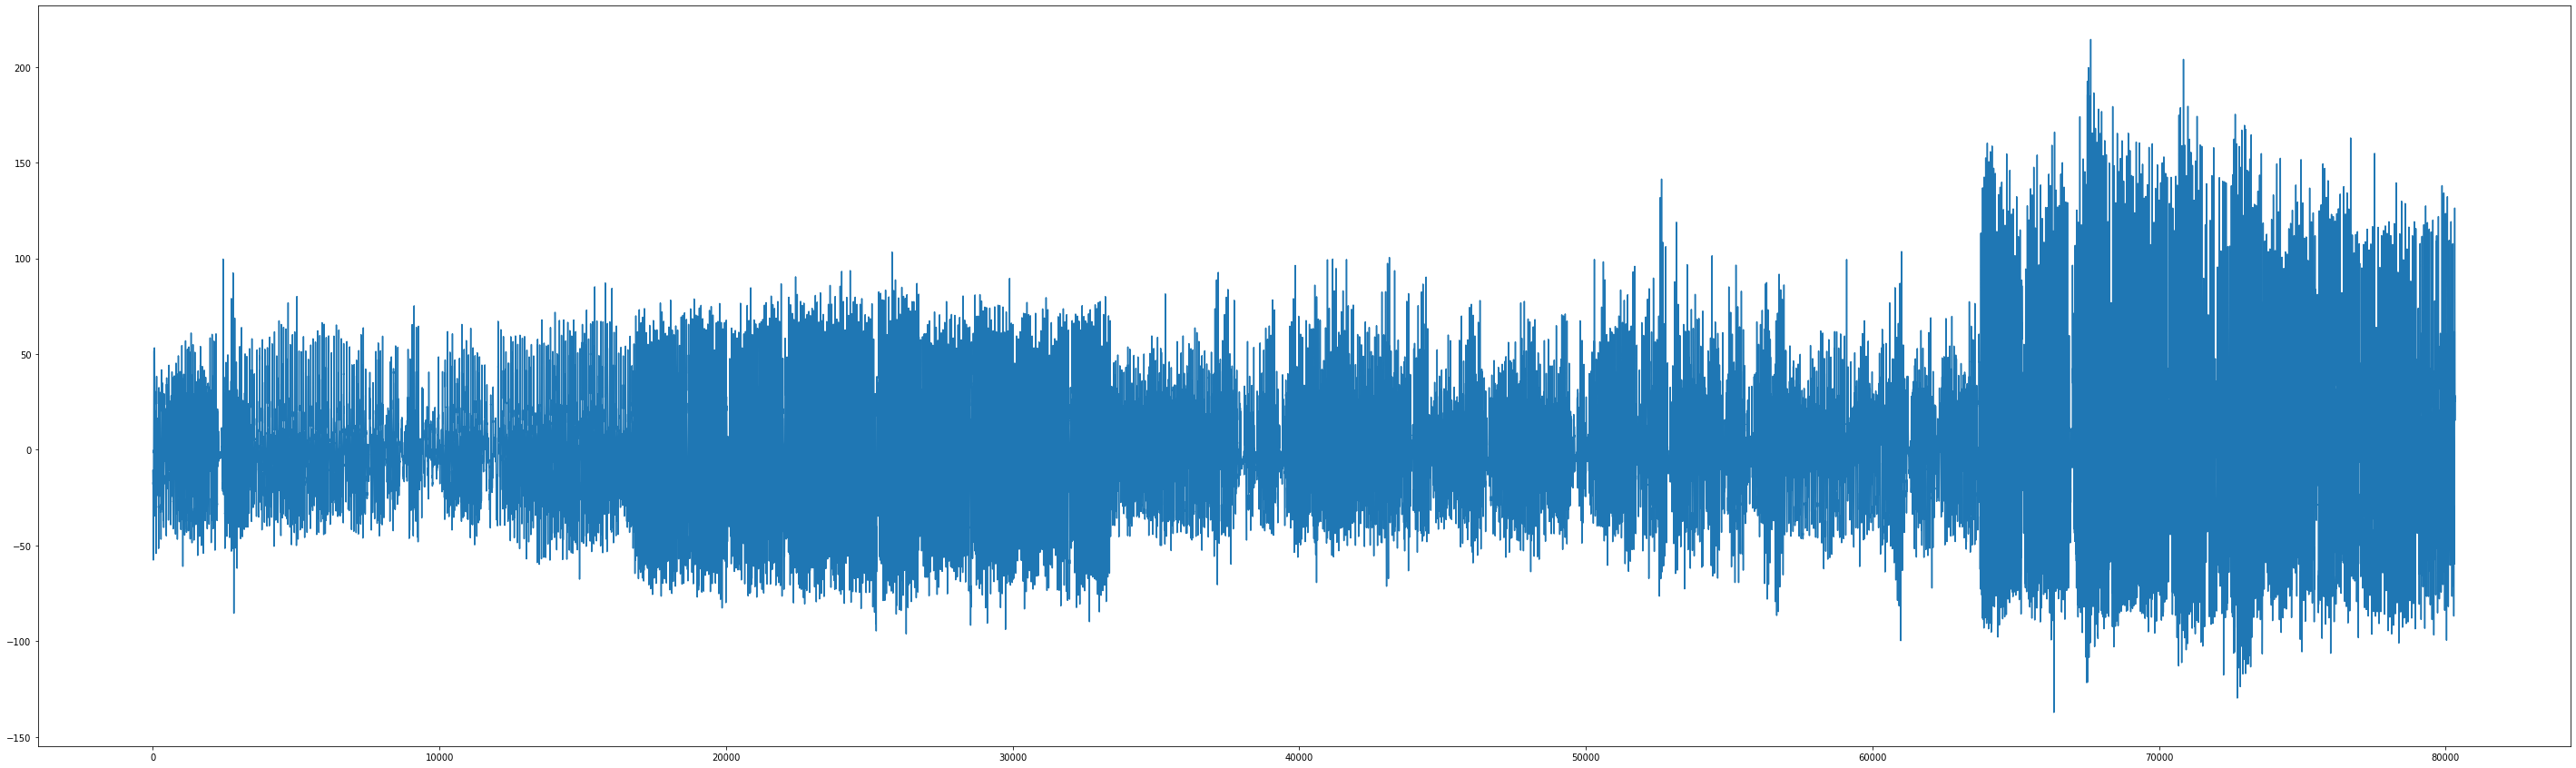

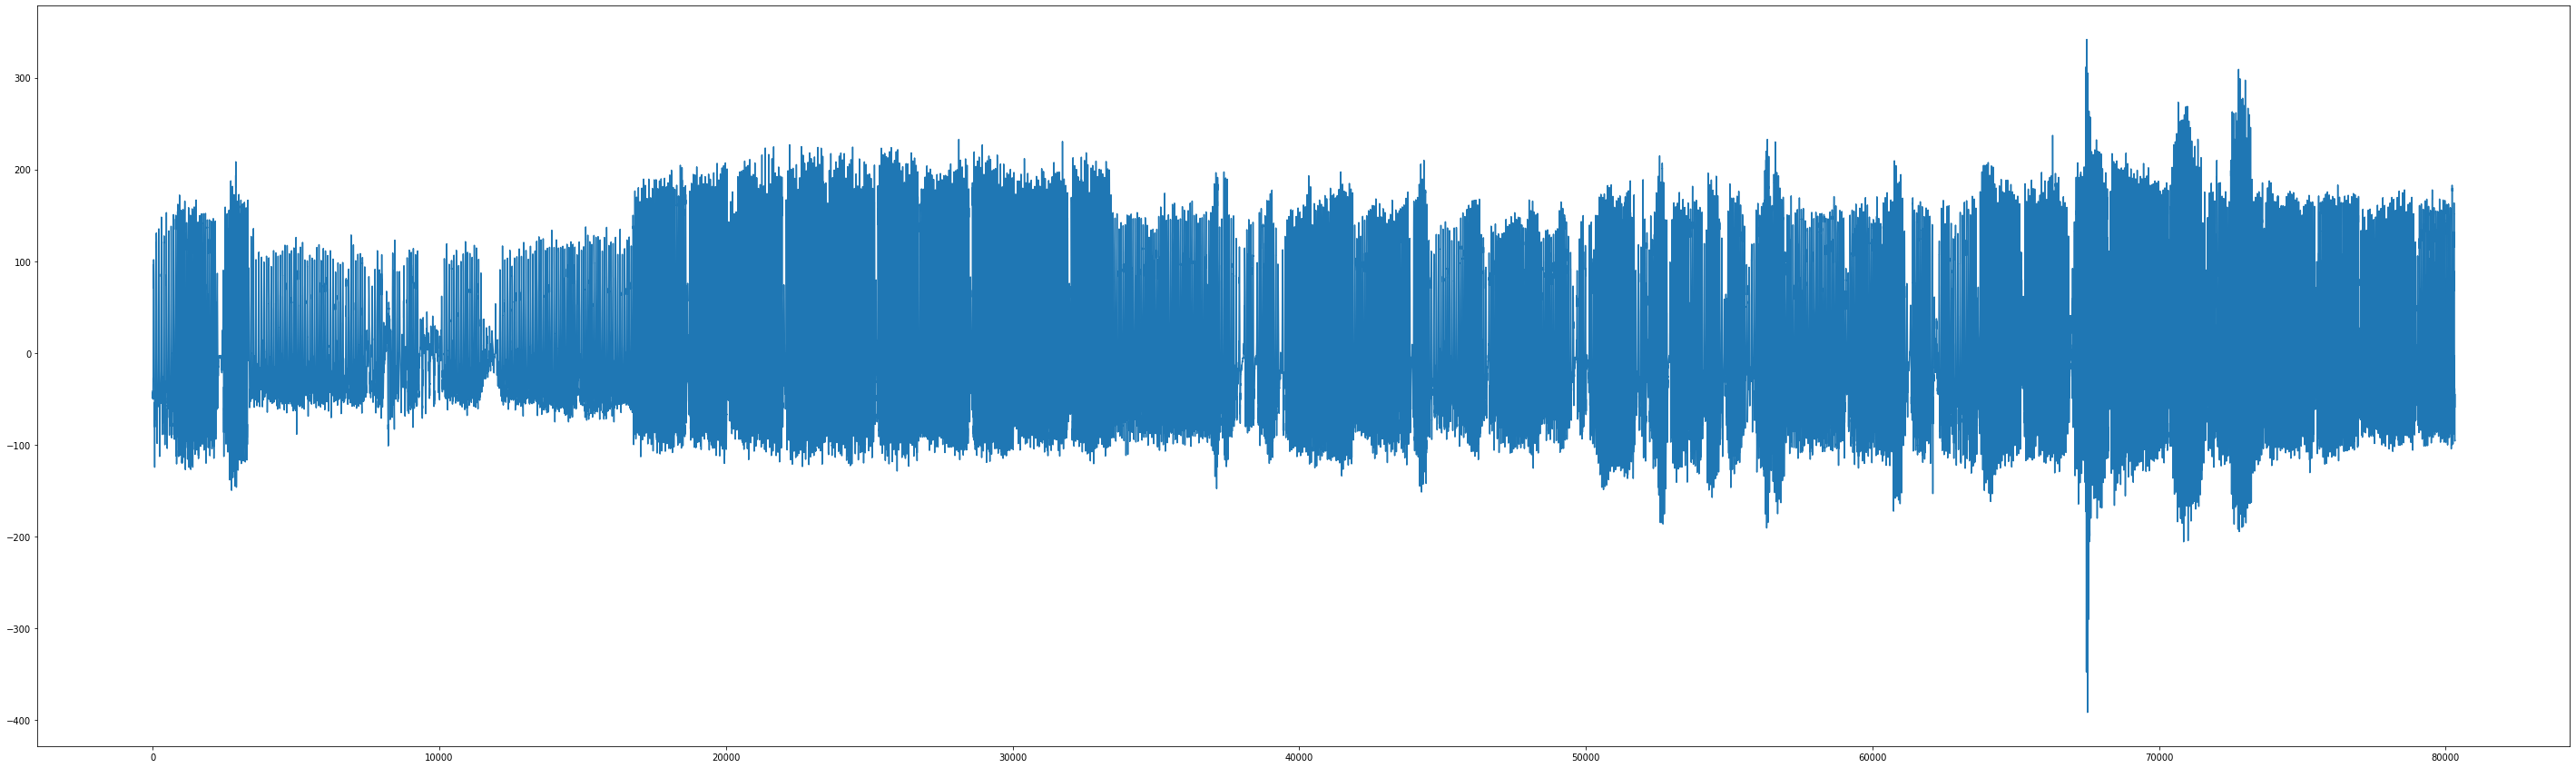

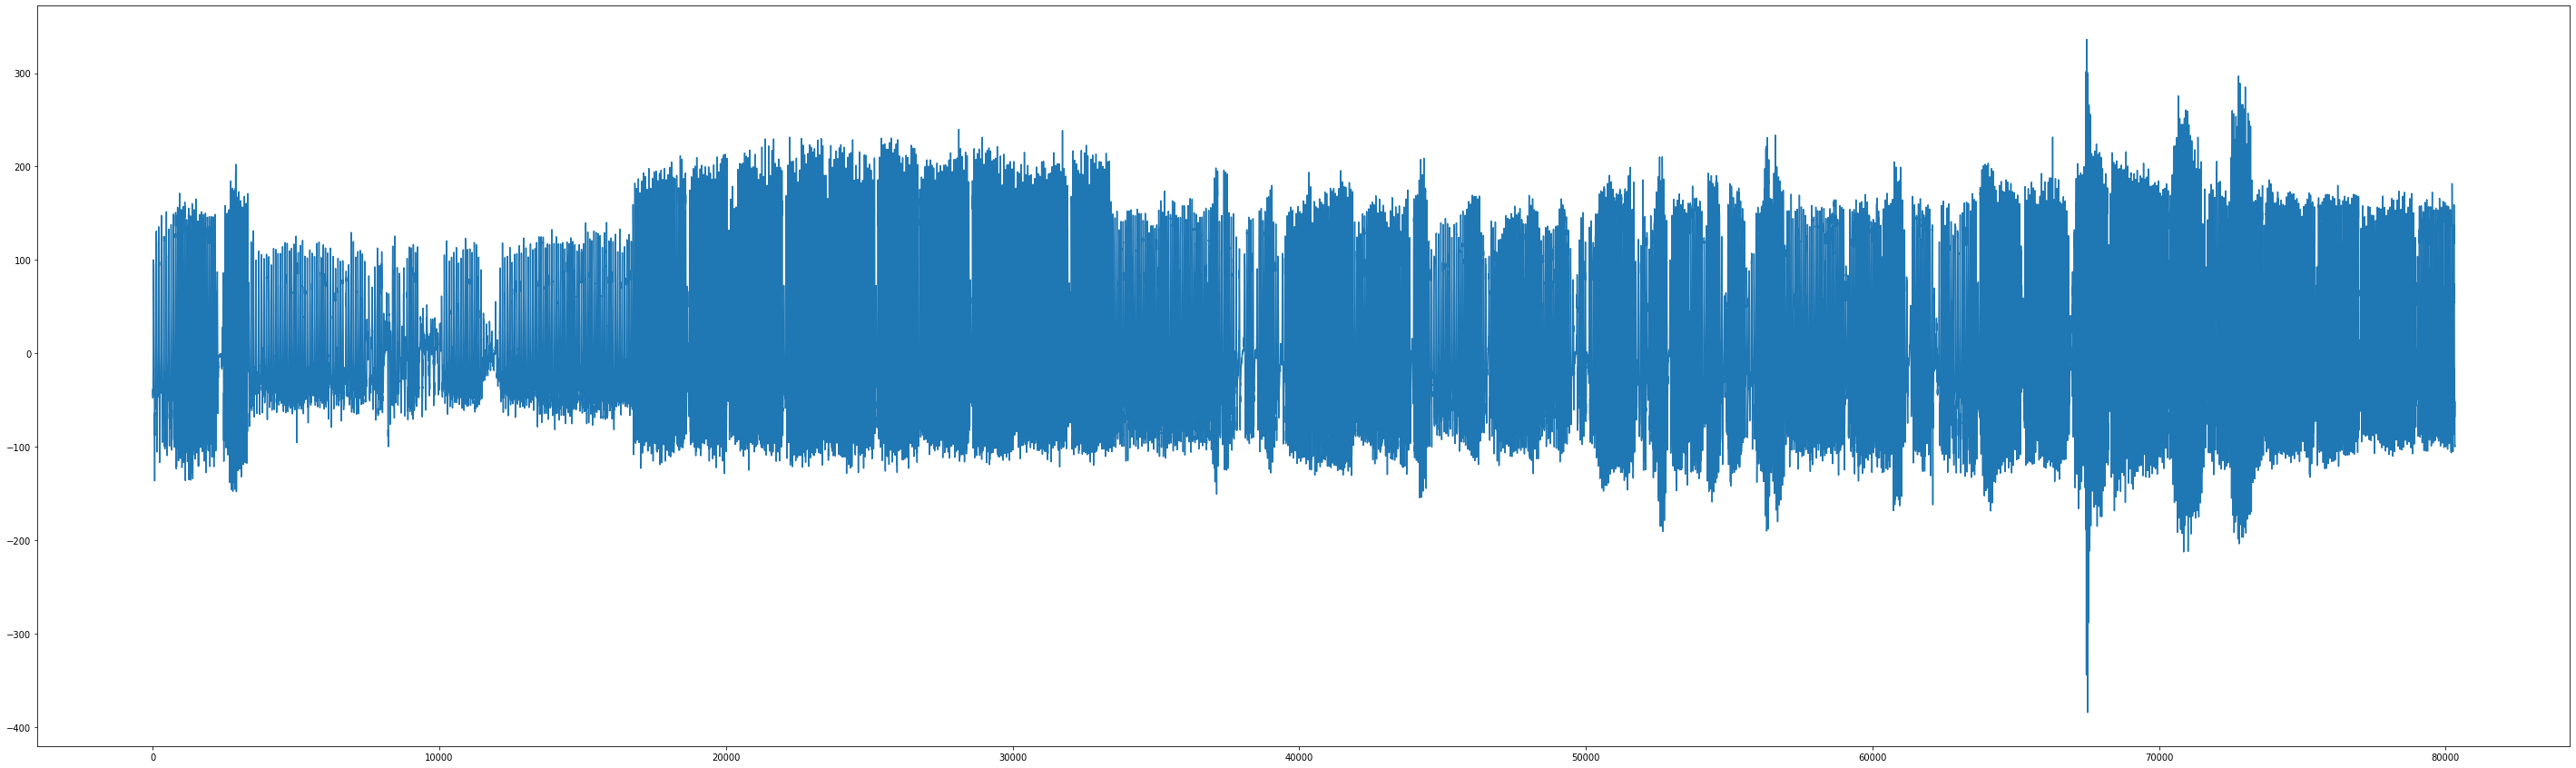

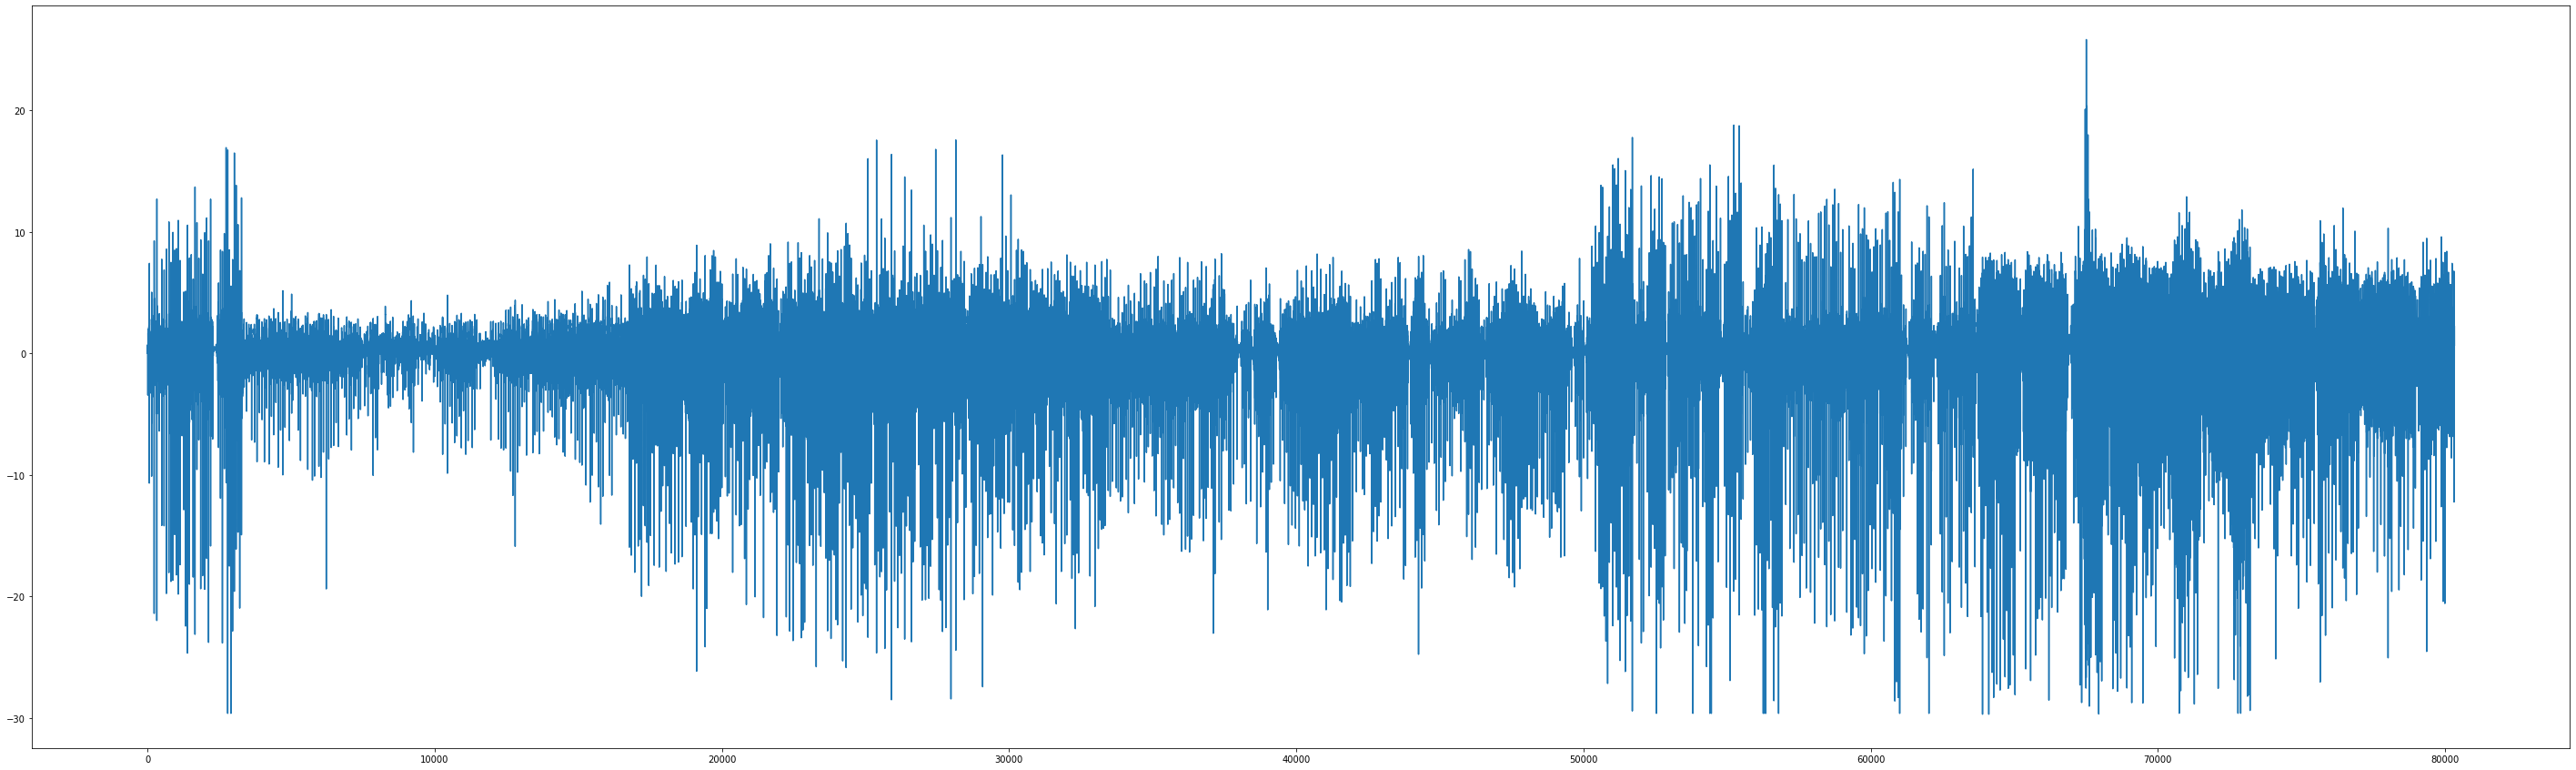

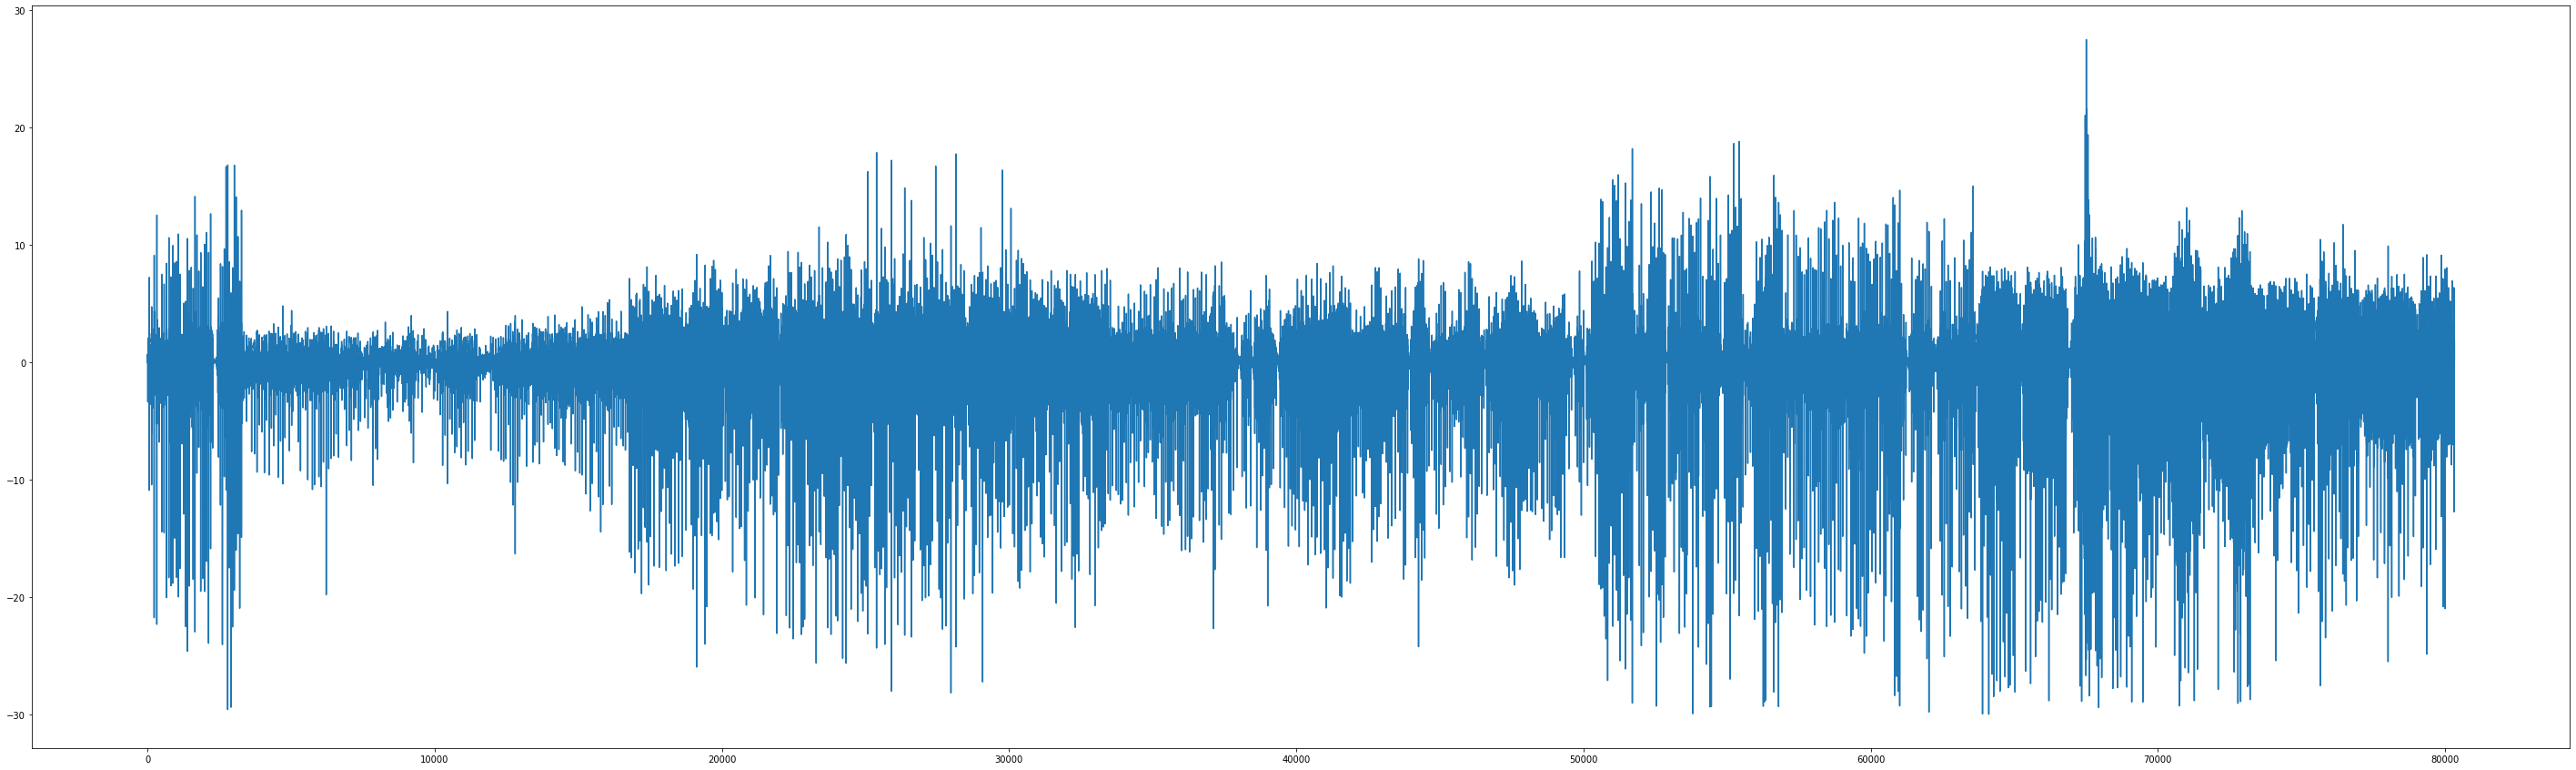

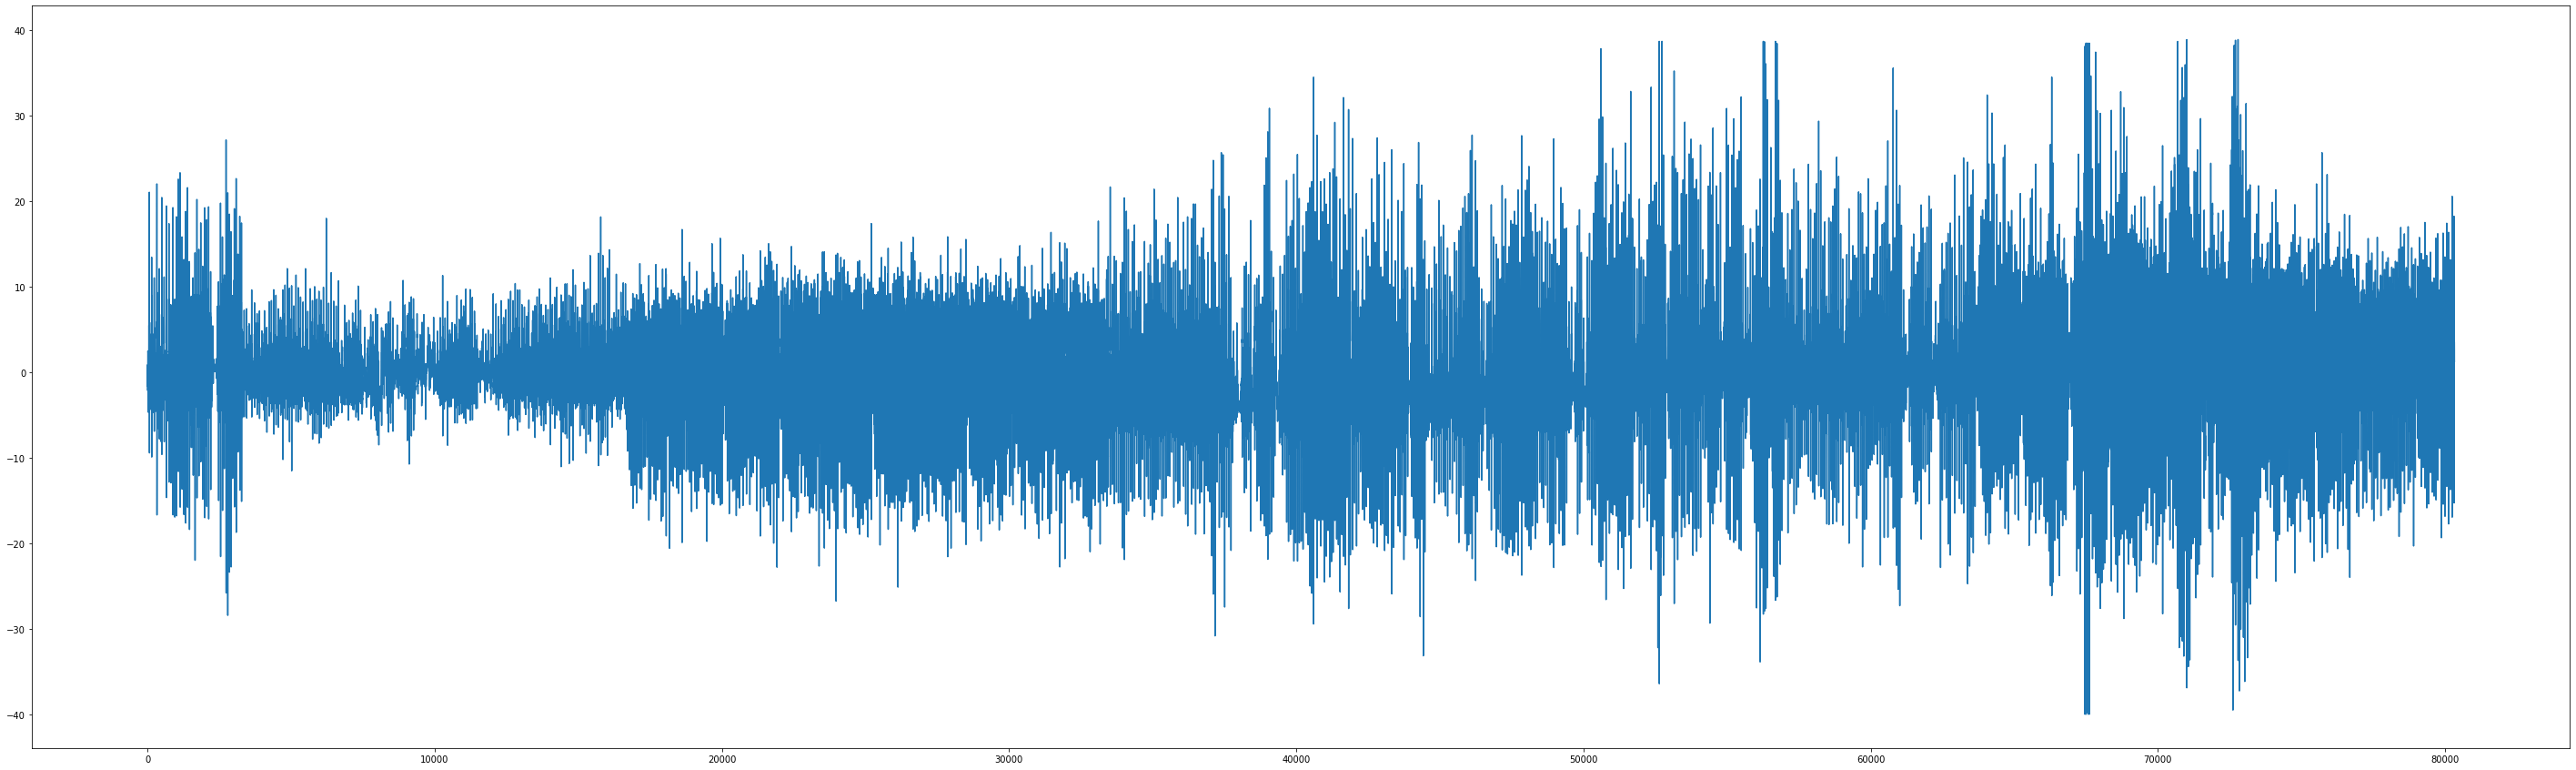

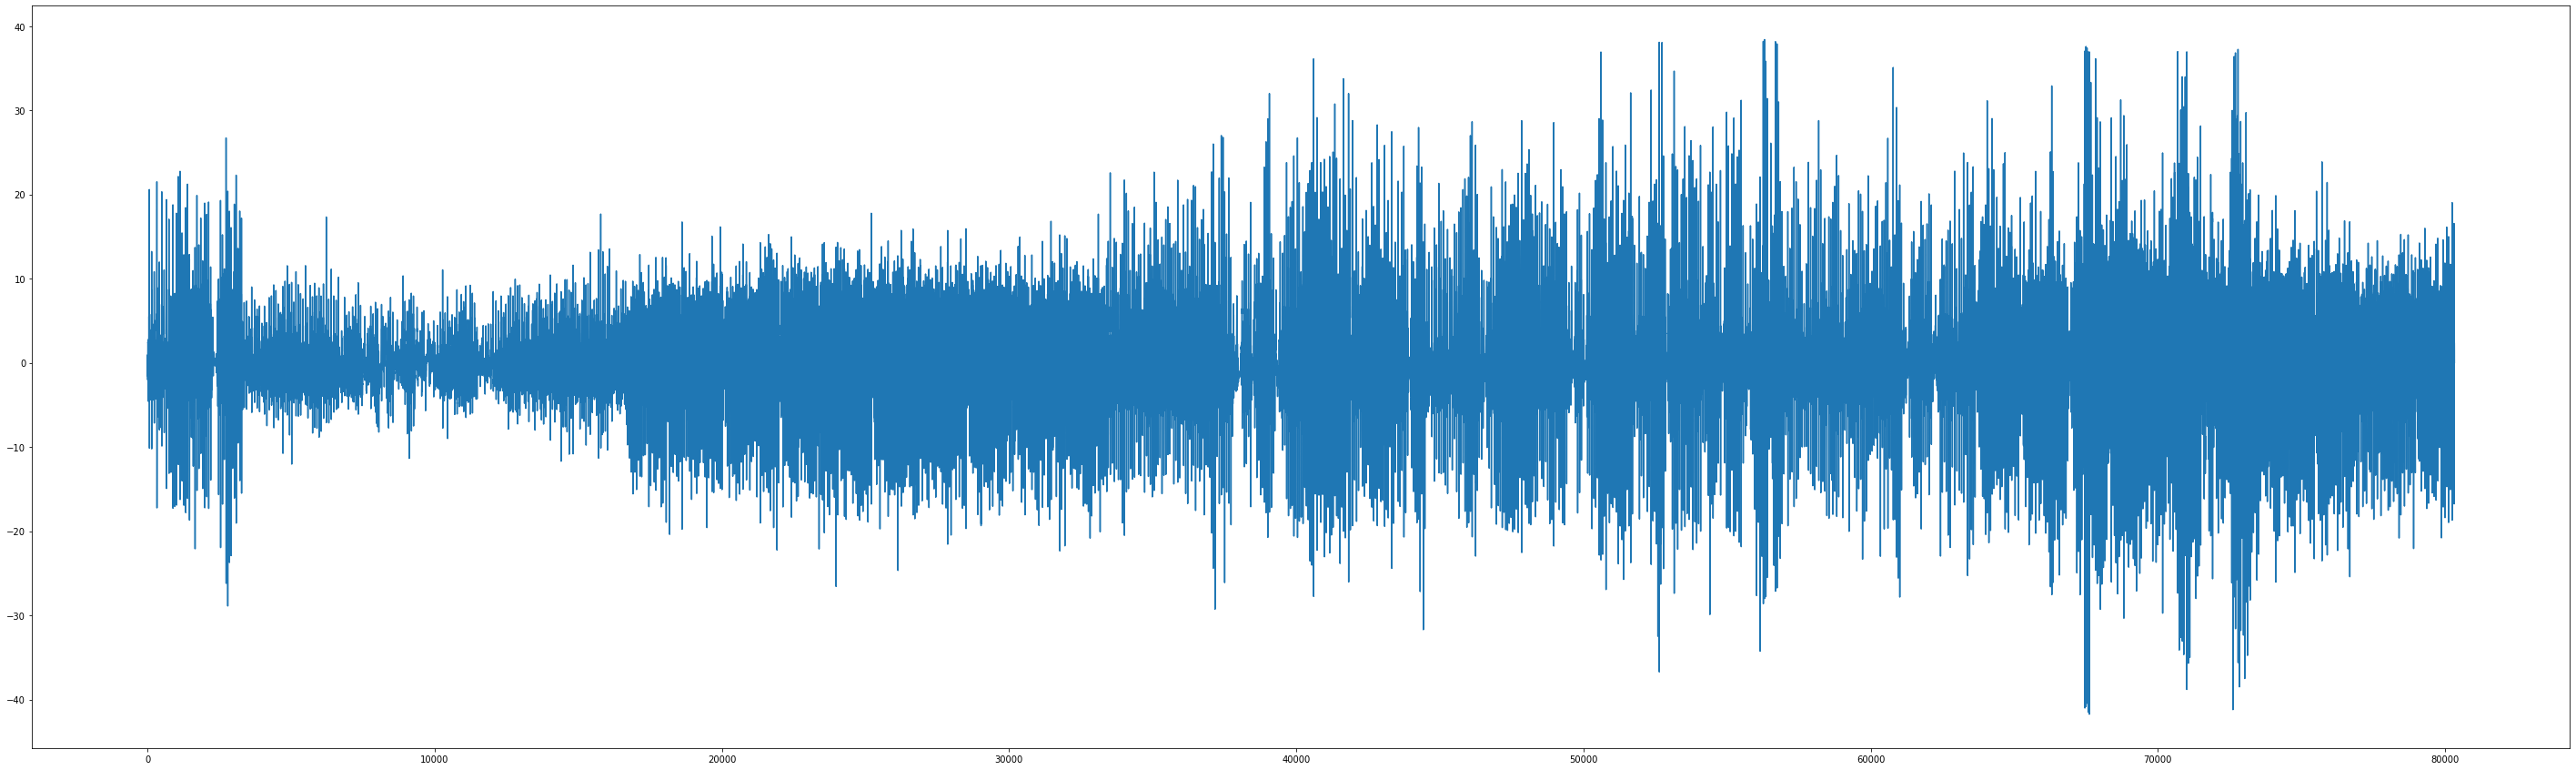

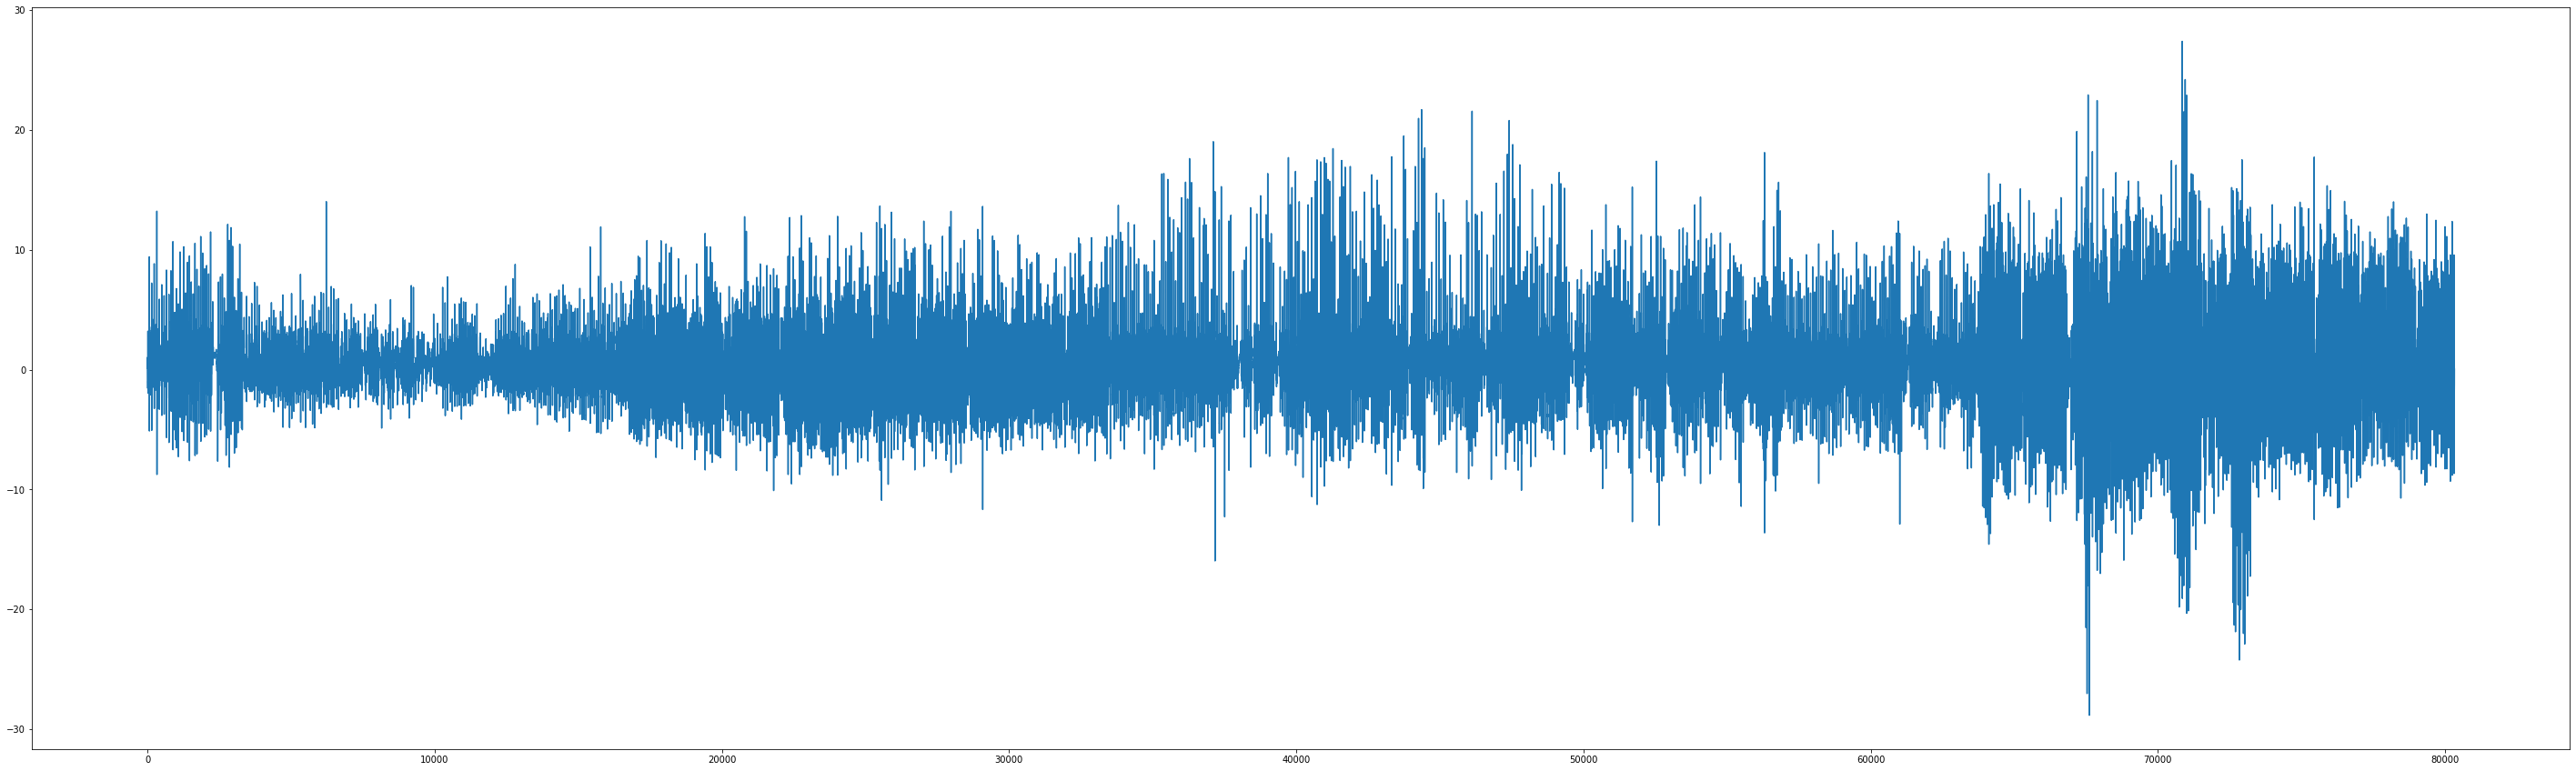

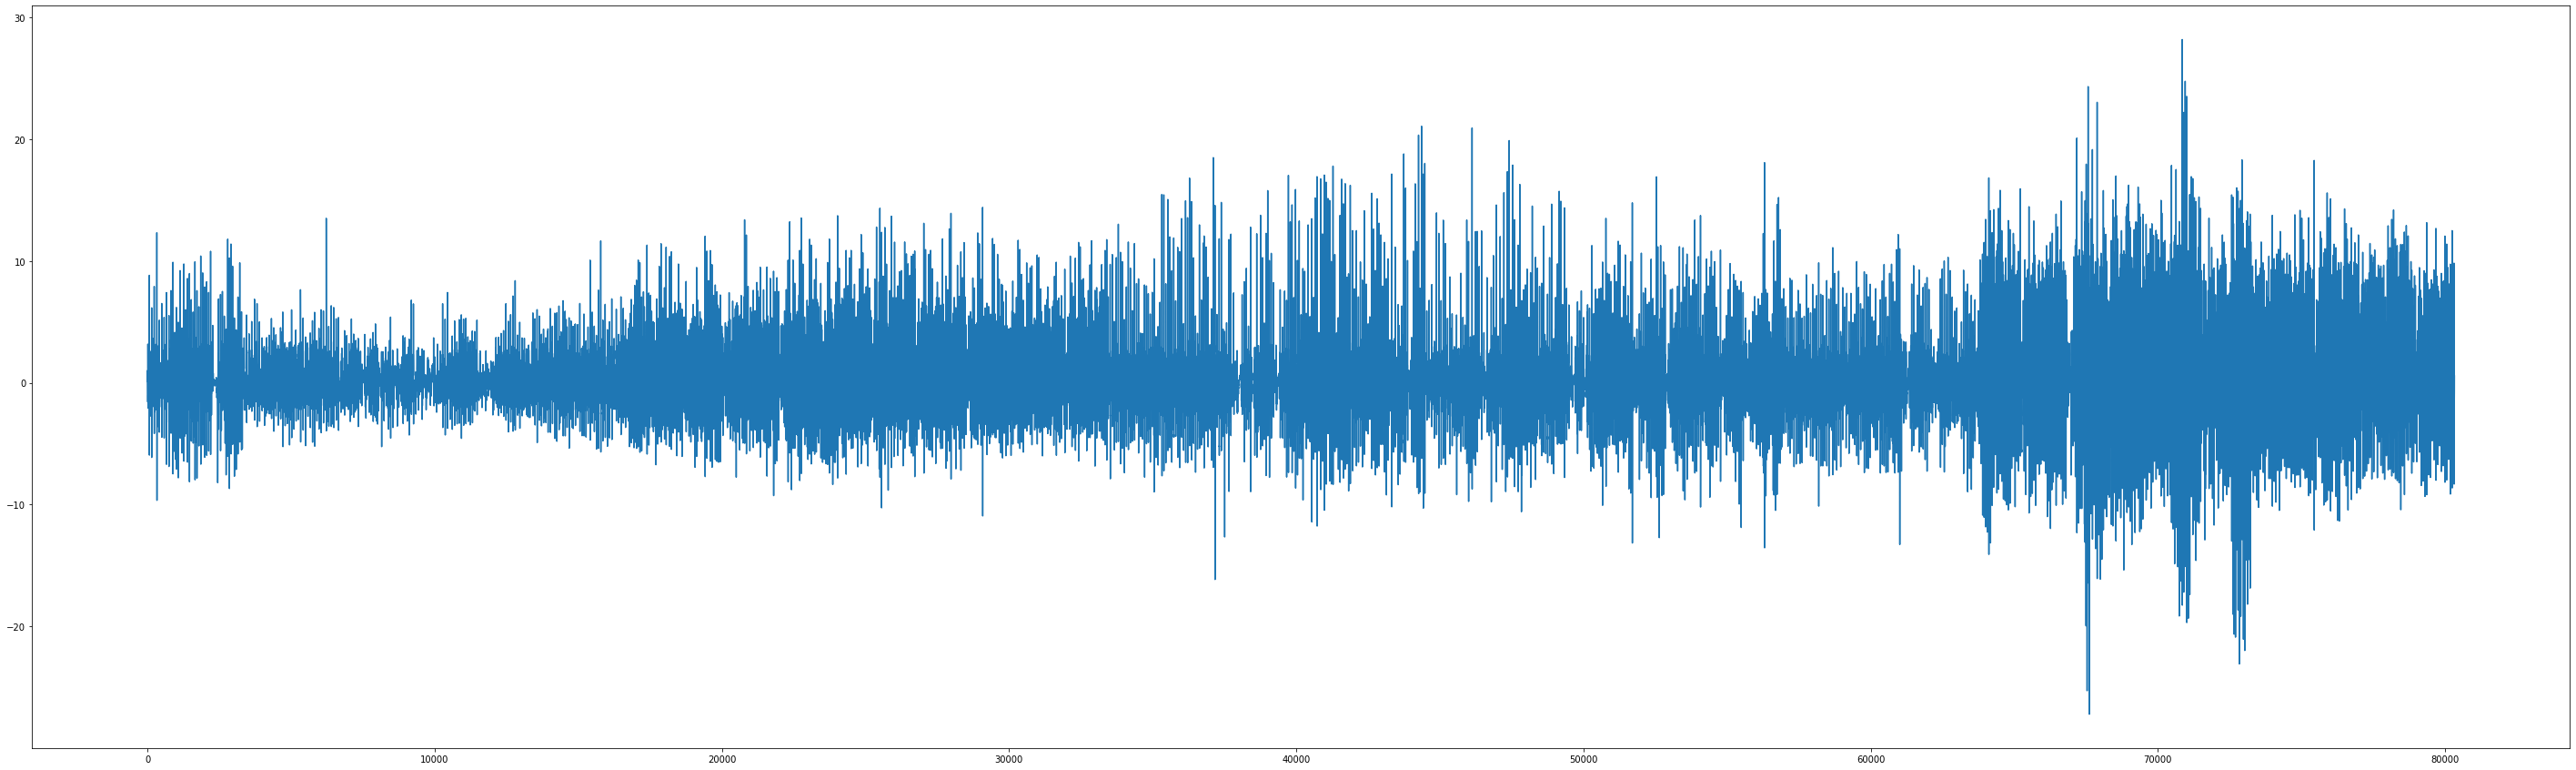

In [269]:
col_means = df.mean()
sos = signal.butter(1, 0.1, 'hp', fs=55, output='sos')
df = df.subtract(col_means)

for j in range(df.shape[1]):
    plt.figure(figsize=figsize)
    plt.plot(np.array(df.iloc[:100000,j]))
    df.iloc[:,j] = signal.sosfilt(sos, np.array(df.iloc[:,j]))
    plt.figure(figsize=figsize)
    plt.plot(np.array(df.iloc[:100000,j]))
    
df += col_means
    

## Outlier removal

In [257]:
df.describe().transpose()

count      mean        std         min        25%        50%  \
Angle  80328.0  0.010305  14.936118  -24.080297 -10.934268  -6.046225   
grav1  80328.0 -0.009416   0.483918   -9.714510  -0.321734  -0.112901   
grav2  80328.0  0.003787   2.386674   -5.345675  -2.098835   0.014676   
grav3  80328.0 -0.001497   0.859927   -2.884278  -0.541010  -0.063987   
gyro1  80328.0 -0.001262  59.097077 -613.145184 -31.074283   8.688569   
gyro2  80328.0  0.011427  32.027064 -137.180271 -18.818201   0.661524   
gyro3  80328.0  0.005289  86.297796 -384.290526 -68.258409 -29.688263   
accl1  80328.0 -0.010365   3.190450  -29.990948  -0.773206   0.285325   
accl2  80328.0  0.003218   5.048985  -41.751189  -2.270863   0.020775   
accl3  80328.0 -0.002003   2.441278  -27.220531  -0.972303  -0.147317   

             75%         max  
Angle   9.075003   44.466623  
grav1   0.268177    2.037931  
grav2   2.235981    5.043896  
grav3   0.483419    4.576815  
gyro1  37.123485  288.024487  
gyro2  19.801264  214.352931  
gyro3  70.621124  336.010595  
accl1   1.343118   27.510868  
accl2   2.248436   38.407543  
accl3   0.904771   28.185336

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\python37\lib\site-packages\ipykernel_launcher.

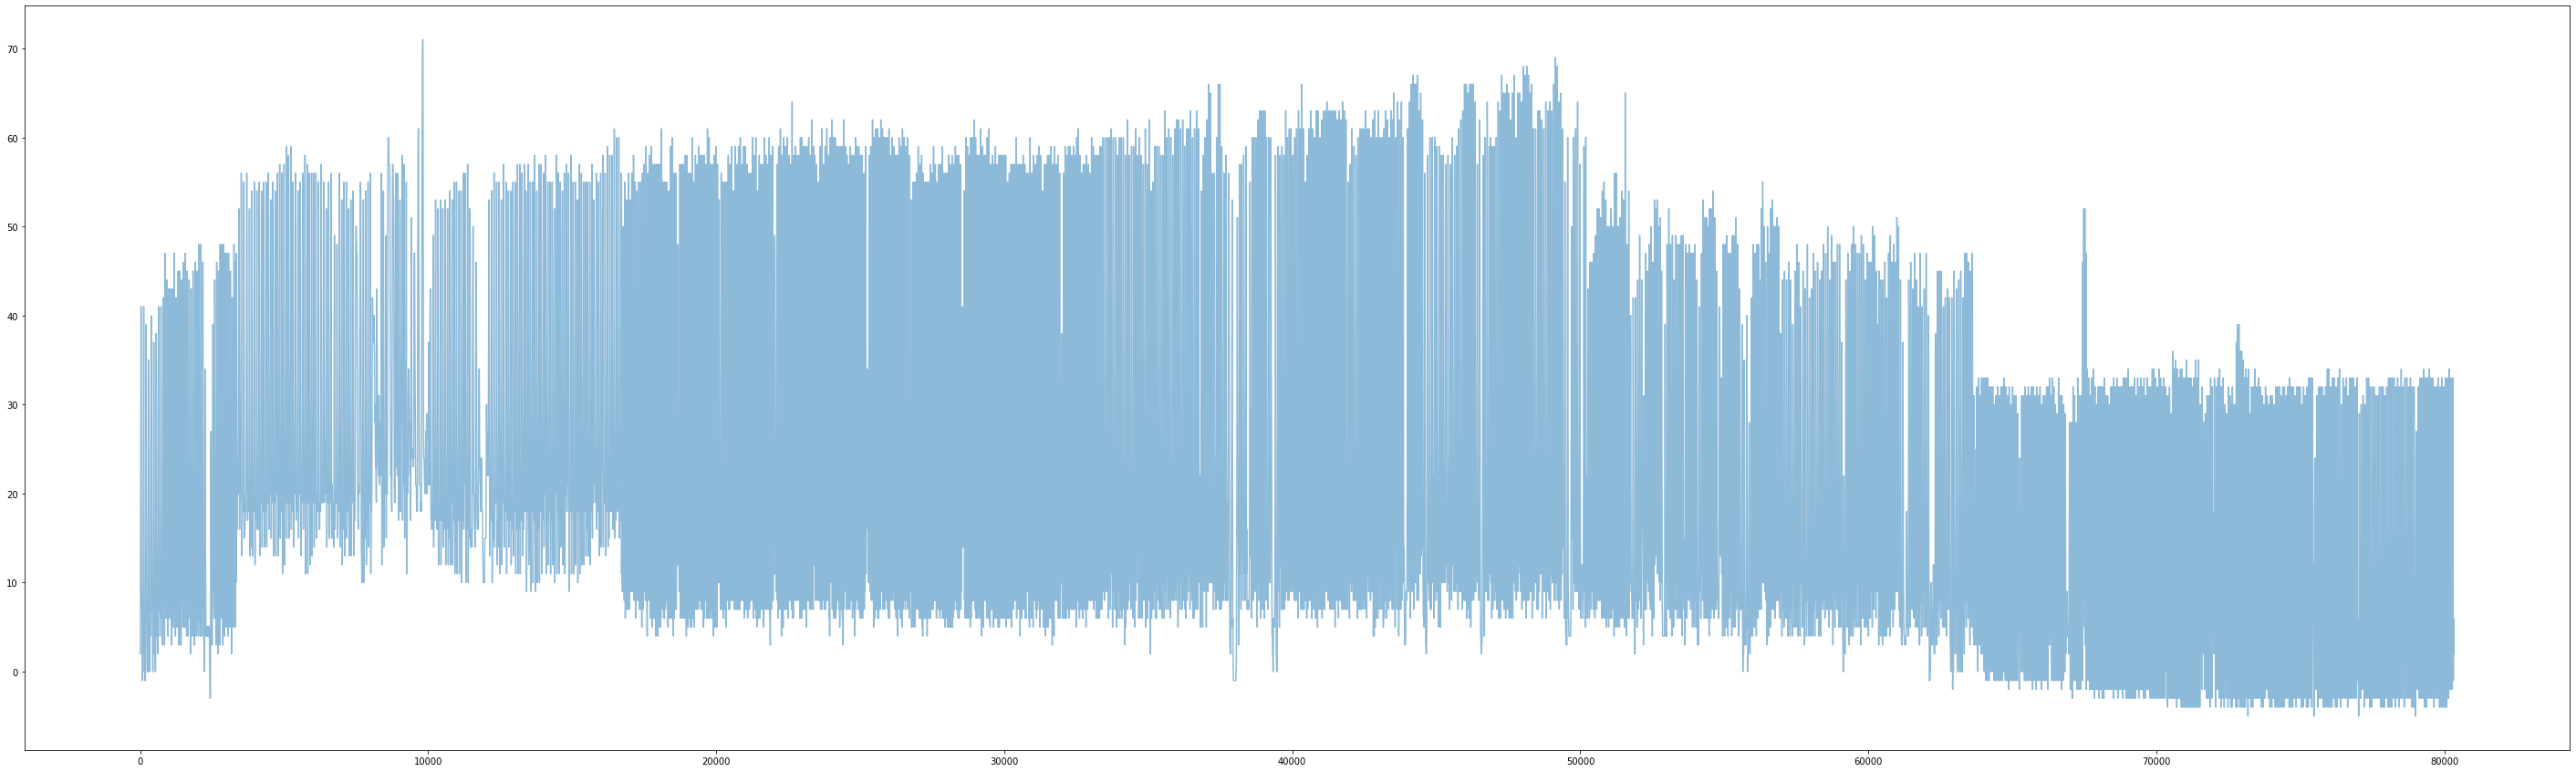

In [212]:
df['grav1'][df['grav1'] > -6] = df['grav1'].mean()
df['grav2'][df['grav2'] < -6] = df['grav2'].mean()

df['gyro1'][df['gyro1'] < -300] = df['gyro1'].mean()
df['gyro3'][df['gyro3'] < -200] = df['gyro3'].mean()

data = np.array(df)
y = data[:,0]
X = data[:,1:]

plt.figure(figsize=figsize, facecolor=(1,1,1))
plt.plot(y[:], alpha=0.5)
#plt.plot(X[:, 0], alpha=1)

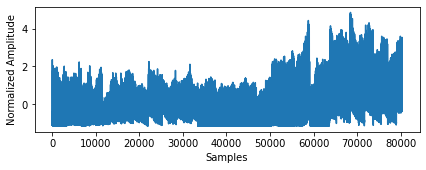

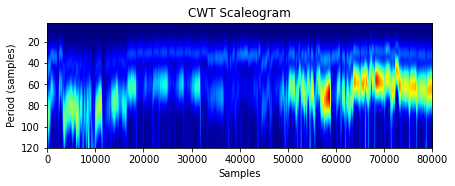

In [163]:
X = preprocessing.scale(X)

feat = 0

scales = np.arange(2, 120)
coefs, freqs = pywt.cwt(X[:,feat], scales, 'cmor-1-1')
coefs = np.abs(coefs)
plt.figure(figsize=(6.9,2.3))
plt.plot(X[:,feat])
plt.xlabel('Samples')
plt.ylabel('Normalized Amplitude')

plt.figure(figsize=(6.9,2.3))
plt.imshow(coefs, extent=[0, 80000, 120, 2], cmap='jet', aspect='auto',
            vmax=coefs.max(), vmin=-coefs.min())
plt.title('CWT Scaleogram')
plt.xlabel('Samples')
plt.ylabel('Period (samples)')
plt.show() 

# Code snippets, no longer used

In [263]:
# csv formatting
'''
data_dir = ".\ml_data_v2\csv"
data = []

for f in os.listdir(data_dir):
    if f[0] is not '.':
        df = pd.read_csv(os.path.join(data_dir, f))
        df.columns=['remove0','time','dt','remove1','remove2','Angle','remove3',
                     'grav1','grav2','grav3','remove4','gyro1','gyro2','gyro3',
                     'remove5','magnet1','magnet2','magnet3','remove6',
                     'euler1','euler2','euler3','remove7','accl1','accl2','accl3',
                     'remove8','linaccl1','linaccl2','linaccl3','remove8','quat1',
                     'quat2','quat3','quat4']
        df = df[df.columns.drop(list(df.filter(regex='remove.*')))]
        data.append(df)
        df.to_csv(os.path.join(data_dir,'tmp', f))

data[0].head()'''

'\ndata_dir = ".\\ml_data_v2\\csv"\ndata = []\n\nfor f in os.listdir(data_dir):\n    if f[0] is not \'.\':\n        df = pd.read_csv(os.path.join(data_dir, f))\n        df.columns=[\'remove0\',\'time\',\'dt\',\'remove1\',\'remove2\',\'Angle\',\'remove3\',\n                     \'grav1\',\'grav2\',\'grav3\',\'remove4\',\'gyro1\',\'gyro2\',\'gyro3\',\n                     \'remove5\',\'magnet1\',\'magnet2\',\'magnet3\',\'remove6\',\n                     \'euler1\',\'euler2\',\'euler3\',\'remove7\',\'accl1\',\'accl2\',\'accl3\',\n                     \'remove8\',\'linaccl1\',\'linaccl2\',\'linaccl3\',\'remove8\',\'quat1\',\n                     \'quat2\',\'quat3\',\'quat4\']\n        df = df[df.columns.drop(list(df.filter(regex=\'remove.*\')))]\n        data.append(df)\n        df.to_csv(os.path.join(data_dir,\'tmp\', f))\n\ndata[0].head()'

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


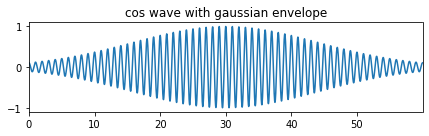

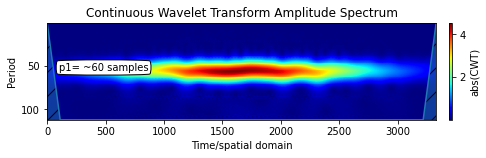

In [142]:
# Kaggle wavelet tutorial

# a range of scales to perform the transform
# 1 period = f samples

scg.set_default_wavelet('cmor1-1')
scales = scg.periods2scales( np.arange(1, f*2) )

# and a periodic signal with varying amplitude
p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(time, periodic1); 
ax1.set_xlim(0, max(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1= ~60 samples", xy=(100, f), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

Default wavelet function used to compute the transform: cmor1-1 ( Complex Morlet wavelets )


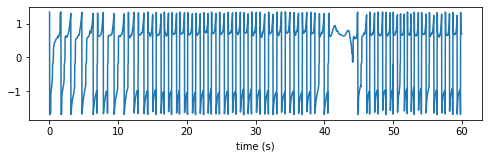

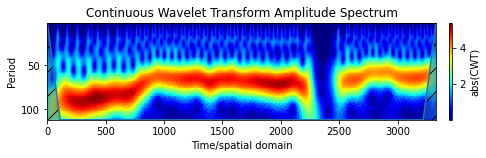

In [220]:
# Kaggle wavelet tutorial

# Visualize using scaleograms package

# a range of scales to perform the transform
# measure period using sameples
# eg. period of 60 samples for signal sampled at 60Hz corresponds to time period of 1s
scg.set_default_wavelet('cmor1-1')

scales = scg.periods2scales( np.arange(2, f*2) )
to_plot = -1

# and a periodic signal with varying amplitude
#p1=1; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/(2*f))/20)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.9,2.3));  
lines = ax1.plot(time[:to_plot], X[:,8][:to_plot]); 
#ax1.set_xlim(0, max(time))
ax1.set_title("")
ax1.set_xlabel("time (s)")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(X[:,8][:to_plot], scales=scales, figsize=(6.9,2.3));
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")